### <img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales - 2019-2 </h1>

<H3 align='center'> Tarea 2  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en pandas y numpy, preprocesamientos
* Recurrent Neural Networks 
* LSTM, GRU
* Autoencoders
* GAN
 


**Formalidades**  
* Equipos de trabajo de 2 personas (*Ambos estudiantes deben estar preparados para presentar la tarea el día de la entrega*).
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico del ayudante (<alvaro.valderrama.13@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>).   Especificar el siguiente asunto: [INF-395/477-2019 Tarea 2]. Invitar como colaborador al usuario de github "avalderr" para poder acceder al repositorio en caso de ser privado.
* Fecha de entrega y presentaciones: 21 de Febrero 2020 (Fase I). Hora límite de entrega: 23:59. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.  

<hr style="height:2px;border:none"/>

La tarea se divide en tres partes:

* 1 - Redes Recurrentes en Texto
* 2 - Autoencoders en Fashion MNIST    
* 3 - GAN para MNIST.

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo, solo son guias y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con *comentarios* en celdas _Markdown_, con los comentarios de la pregunta y con cualquier analisis, fórmula (en $ \LaTeX $) o explicación que les parezca relevante para justificar sus procedimientos. *No respondan las preguntas en comentarios en el código*.
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará tanto la elección en si. En cambio la argumentación detrás de la elección será lo más ponderado.
Si algun modelo se demora demasiado en correr en su maquina, no olvide que puede correr _Jupyter Notebooks_ en _Collab_ de Google, incluso con la opción de aceleración con GPU (particularmente útil para los modelos más grandes), esto puede ser relevante para las maquinas más lentas al momento de realizar exploraciones con _K-folds_ o las redes más grandes. Existe también la posibilidad de utilizar _Google Cloud Plataform_, donde tienen 300 dolares de prueba por un año y pueden comprar tiempo de procesamiento en maquinas aceleradas con GPU; maquinas ya configuradas para _deep leraning_ pueden encontrarse en el _Marketplace_.

# 1 - Redes Recurrentes en texto

El analisis de texto y en general de lenguaje natural es una de las tareas desafiantes que los avances tanto del machine learning como de redes neuronales han logrado potenciar el los último años. La naturaleza inherentemente secuencial del texto y sus características similares a variables categóricas han inspirado muchos avances interesantes en el area. Para esta primera aproximación a procesamiento de secuencias, y en particular de texto, utilizaremos un dataset relativamente estandar, de texto anotado con categorias de entidades. Este dataset se encuentra disponible en el siguiente link https://www.kaggle.com/abhinavwalia95/entity-annotated-corpus. 

Durante esta pregunta realizaremos dos tareas distintas, la de predicción del _tag_ para cada palabra de la secuencia (_many to many_) y la de predicción del siguiente caracter (_many to one_). 


#### 1.a El dataset

Investigue en la documentación del dataset cual es la tarea original para el cual fue propuesto, en particular cual es la variable que buscamos predecir, a qué se refiere esta misma y por qué es necesario utilizar técnicas avanzadas para resolver esta tarea (¿no bastaría con un diccionario? De un ejemplo en caso contrario). 

Cargue el conjunto de datos. Este conjunto de datos es bastante grande, por lo que como ven en el código propuesto, nos contentaremos con no considerar las lineas corruptas del registro.

Solo nos quedaremos con `word` y `lemma` de las variables regresoras, guardando `sentence_idx` para poder reconstruir las frases como unidad básica con la que trabajaremos. ¿Qué diferencia hay entre la palabra y su lemma? De ejemplos donde la diferencia sea significativa y explique en qué circunstancias preferiría una sobra la otra. 

Para la primera parte de estas preguntas, preferiremos los lemas pues buscaremos predecir el `tag` de la palabra.

**Respuesta**: El propósito original de este dataset es lograr un reconocimiento de entidades nombradas. Esto consiste en la extracción de información para clasificar palabras de un texto en diferentes categorías, como nombres, lugares geográficos, organizaciones, entre otras. En el *dataset*, la variable asociada a las categorías que puede tener una palabra se denomina `tag`. Se hace necesario usar técnicas avanzadas para establecer patrones basados en el contexto en el que están escritas las palabras dentro de la oración, ya que una palabra puede tener diferentes significados en diferentes contextos. Además que la clasificación de categorías también puede llegar a considerar palabras compuestas. Por estas razones un diccionario no sería útil en este tipo de problemas. Por ejemplo: José Córdoba debería ser clasificado como [Persona] José Córdoba, pero un diccionario podría llegar a clasificarlo como [Persona] José [Ciudad] Córdoba.

La variable `lemma` representa la estructura base de cualquier palabra que derive de ésta, como conjugaciones de verbos, plurales y usos como sustantivos propios. Por otro lado, la variable `word` es cualquier palabra usada en el lenguaje natural, que deriva de algún `lemma`. Por ejemplo, en el *dataset* se puede apreciar la palabra "*marched*" que deriva del `lemma` "*march*". Ambas variables son útiles en distintos contextos, para predicción de `tags` conviene usar `lemma` porque es más sencillo, en términos computacionales, establecer patrones en estructuras de palabras que tienen menos variaciones, porque eso significa trabajar con menos variables. Para un verbo conjugado en distintos tiempos, su codificación dará como resultado un valor numérico por cada conjugación, mientras que usando `lemma` se mantiene la simplicidad de utilizar la misma estructura básica en todos los usos que se le dé.

Por otro lado, en un problema de generación de texto, que se basa en una red que se encarga de predecir el siguiente caracter a partir de una oración (compuesta de caracteres), es más conveniente utilizar la variable `word` porque entrega todas las variaciones posibles (dependiendo del *dataset* que se ocupe) de una palabra, enriqueciendo el vocabulario disponible y pudiendo generar textos más "humanos" en términos semánticos.

In [0]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

# check if dataset exist
!ls

sample_data


In [0]:
!mkdir /root/.kaggle
!echo '{"username":"sebastingallardo","key":"df9d642f8dce03217fe5b41f25881f75"}' > /root/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d abhinavwalia95/entity-annotated-corpus

 34% 9.00M/26.4M [00:01<00:02, 8.24MB/s]
100% 26.4M/26.4M [00:01<00:00, 18.9MB/s]


In [0]:
!unzip -q 'entity-annotated-corpus.zip'

In [0]:
import os
import glob
print(os.getcwd())
data_path = os.path.join(os.getcwd())
print(os.listdir(data_path))

/content
['.config', 'ner_dataset.csv', 'entity-annotated-corpus.zip', 'ner.csv', 'sample_data']


In [0]:
import pandas as pd
df = pd.read_csv(os.path.join("ner.csv"), engine='python', error_bad_lines=False)
df = df.dropna()[['lemma','tag','word','sentence_idx']]

Skipping line 281837: Expected 25 fields in line 281837, saw 34


In [0]:
print(df[0:20])

       lemma    tag           word  sentence_idx
0   thousand      O      Thousands           1.0
1         of      O             of           1.0
2   demonstr      O  demonstrators           1.0
3       have      O           have           1.0
4      march      O        marched           1.0
5    through      O        through           1.0
6     london  B-geo         London           1.0
7         to      O             to           1.0
8    protest      O        protest           1.0
9        the      O            the           1.0
10       war      O            war           1.0
11        in      O             in           1.0
12      iraq  B-geo           Iraq           1.0
13       and      O            and           1.0
14    demand      O         demand           1.0
15       the      O            the           1.0
16  withdraw      O     withdrawal           1.0
17        of      O             of           1.0
18   british  B-gpe        British           1.0
19     troop      O 

#### 1.b Preprocesamiento

Para poder utilizar este conjunto de datos, debemos transformar nuestra tabla de palabras y sentencias, a una tabla donde cada entrada sea una sentencia, ademas codificando los distintos lemmas y tags como valores numericos. Esto pueden realizarlo con alguna de las utilidades de `keras` o `sklearn`, sin embargo en el código siguiente se propone un metodo solo usando python y `pandas`. Pueden utilizar el método que deseen. Note eso si que independiente la aproximación que utilice debe comenzar desde 1 para la codificación, pues el valor 0 lo reservaremos para representar la ausencia de palabras más adelante. 

Complete y explique que realiza cada linea del código.

**Respuesta**: La primera línea define el diccionario `lemma_to_code`, que asigna un valor numérico por cada *lemma* posible en el *dataset*. Así, todos los *lemmas* únicos tendrán un valor numérico distinto. La segunda línea define el diccionario `tag_to_code`, que hace algo similar pero ahora con los tags existentes en el *dataset*. La línea siguiente entrega el número de lemmas existentes. La siguiente línea transforma todos los lemmas del *dataset* a sus valores numéricos obtenidos anteriormente. La siguiente línea hace lo mismo, ahora para los tags. Finalmente se redefine un nuevo dataset con estas dos columnas además de la columna `sentence_idx`, que sirve para agrupar los lemmas y tags según la oración a la que estos pertenecen. Más abajo se agrega la llave "PAD" al diccionario de tags, con el valor 0, que se usará más adelante.

In [0]:
import numpy as np

lemma_to_code = {lemma:code+1 for code, lemma in enumerate(df.lemma.unique())}
tag_to_code = {tag:code+1 for code, tag in enumerate(df.tag.unique())}
n_lemmas = len(lemma_to_code)

df['lemma'] = df.lemma.apply(lambda x: lemma_to_code[x])
df['tag'] = df.tag.apply(lambda x: tag_to_code[x])

dff = df.groupby("sentence_idx")[['lemma','tag']].agg(list).applymap(np.asarray)

In [0]:
print(tag_to_code)
tag_to_code["PAD"] = 0
n_tags = len(tag_to_code)
print(n_tags)
print(n_lemmas)

{'O': 1, 'B-geo': 2, 'B-gpe': 3, 'B-per': 4, 'I-geo': 5, 'B-org': 6, 'I-org': 7, 'B-tim': 8, 'B-art': 9, 'I-art': 10, 'I-per': 11, 'I-gpe': 12, 'I-tim': 13, 'B-nat': 14, 'B-eve': 15, 'I-eve': 16, 'I-nat': 17}
18
20239


#### 1.c Padding

Ahora que ya tenemos las sentencias codificadas y agrupadas, explore el tamaño de estas, en número de lemmas: ¿Son todas las sentencias de igual tamaño? ¿Le hace sentido esto? ¿Las redes que conoce pueden manajar ejemplos de distintos tamaños, y si pueden que problemas podría traer? ¿Estan las clases repartidas de manera equitativa?

En esta parte de la tarea, deben lograr que todas las secuencias de lemmas (y los tags correspondientes) queden del mismo largo, es decir realizar _padding_. El _padding_ debe realizarse con el valor 0, pueden escoger si realizarlo al comienzo de la secuencia o al final, expliquen su elección. Pueden utilizar la función `keras.preprocessing.sequence.pad_sequences` o escribir sus propios códigos. Elija un valor de `maxlen` que le parezca adecuado.

¿Opinan que es deseable utilizar el valor 0 como codificación de palabras que "no existen", o creen que es irrelevante por ejemplo que su valor sea 1?

**Respuesta**: No todas las sentencias tienen el mismo tamaño, como se puede apreciar en el *boxplot*, lo cual tiene sentido considerando que el dataset está formado por texto escrito por humanos. Las redes conocidas hasta ahora no pueden manejar inputs de distintas dimensiones, ya que esto significaría que faltarían valores para multiplicar todos los pesos durante el entrenamiento.
Las clases no están repartidas de manera equitativa, como se puede apreciar al imprimir algunos valores del *dataset* modificado, y según la documentación del *dataset*, se observa que gran cantidad de *lemmas* pertenece al tag 1, que significa que no pertenecen a ninguna de las demás entidades.

Se eligio padding al inicio de la secuencia porque el estado del arte lo sugiere así, ya que da mejores resultados, y como las redes recurrentes suelen poner mayor énfasis en la información más actual que llega, suena prudente que esta información corresponda realmente a los valores reales sobre los que se está trabajando. Se decidió optar por el `maxlen` igual al largo de la secuencia más larga: 140.

Es deseable usar *zero padding* porque así no se agrega información innecesaria en la multiplicación de pesos cuando se realiza el entrenamiento. Si se utilizara, por ejemplo, el valor 1, varios pesos tendrían que actualizarse para cubrir el caso de palabras inexistentes, cuando sería más sencillo agregar un valor que no agregue información: el 0.


In [0]:
print(dff.shape)
print(dff)

(35177, 2)
                                                          lemma                                                tag
sentence_idx                                                                                                      
1.0           [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, ...
2.0           [23, 2, 24, 25, 12, 10, 26, 27, 10, 9, 28, 29,...  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
3.0           [42, 5, 19, 10, 43, 2, 44, 8, 45, 46, 12, 47, ...  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 1, 1, ...
4.0           [49, 50, 10, 37, 2, 51, 52, 53, 54, 55, 56, 57...  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
5.0           [10, 9, 60, 61, 10, 62, 2, 10, 63, 64, 2, 65, ...  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 6, ...
...                                                         ...                                                ...
47955.0       [1261, 489, 148, 308, 172, 716, 233, 484, 1360...  [3, 

(50,)
(70,)


{'boxes': [<matplotlib.lines.Line2D at 0x7fb8ff128278>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb8ff129eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb8ff12c4e0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb8ff129cf8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb8ff128e10>,
  <matplotlib.lines.Line2D at 0x7fb8ff1297b8>]}

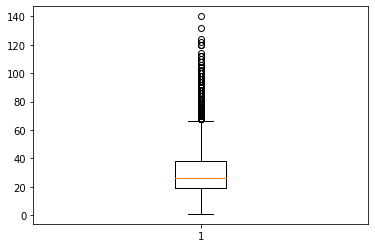

In [0]:
import matplotlib.pyplot as plt

print(dff.iloc[4].lemma.shape)
print(dff.iloc[42].lemma.shape)
largo = []
for i in range(dff.shape[0]):
  largo.append(dff.iloc[i].lemma.shape[0])

plt.boxplot(largo)

In [0]:
print(dff.iloc[423].tag.shape == dff.iloc[423].lemma.shape)
print(dff.iloc[34242].tag.shape == dff.iloc[34242].lemma.shape)
print(np.max(largo))

True
True
140


In [0]:
from keras.preprocessing.sequence import pad_sequences

max_len = 140
x = pad_sequences(dff.lemma.values,
                  maxlen=max_len,
                  padding='pre',
                  truncating='post'
)

y = pad_sequences(dff.tag.values,
                  maxlen=max_len,
                  padding='pre',
                  truncating='post'
)

print(y)

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 2 5 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


#### 1.d Even more encodding and preprocessing

Para la primera tarea, buscaremos realizar la predicción del tag, la cual es una variable categórica. Por lo tanto, como ya sabemos de la tarea anterior, resulta conveniente tener los _targets_ en _one hot vector_. 

Además debemos separar ambos conjuntos (`x` e `y`) en los conjuntos de entrenamiento y validación. 

Realice esto con las herramientas y proporciones que estime convenientes. 

In [0]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

y = [to_categorical(i, num_classes=n_tags) for i in y]
x_tr, x_val, y_tr, y_val = train_test_split(x, y, test_size=0.25, random_state=1)

y_tr = np.array(y_tr)
y_val = np.array(y_val)

print(x_tr.shape)
print(x_val.shape)

(26382, 140)
(8795, 140)


#### 1.e Primera red recurrente

Ahora entrenaremos una primera red recurrente LSTM. Explique la particularidad de estas redes y por qué podría comportarse bien para este tipo de problemas. 

**Respuesta**: En el contexto de las redes neuronales recurrentes, o RNN, éstas son capaces de aprender patrones de entradas anteriores, lo cual es útil para, por ejemplo, predecir la última palabra en una frase. Sin embargo, puede ocurrir que la distancia "contextual" necesaria para la predicción sea muy elevada para realizar una predicción correcta. Por ejemplo, predecir la última palabra de la frase "hay nubes azules en el *cielo*" es relativamente sencillo para una RNN dado que el contexto anterior a la palabra "cielo" está explícito. Pero para frases más complicadas, como "Crecí en Paris, así que ahora tengo bastante fluidez para hablar *francés*", el contexto nos dice que la última palabra debe ser un idioma, ese idioma debe estar relacionado con la locación geográfica mencionada al principio, y así se van agregando capas de complejidad, que para un humano no suena como una tarea difícil pero se hace difícil de manejar con una RNN.

Todas las RNN tienen loops en las capas recurrentes, lo que permite mantener información en "memoria" a través del tiempo. Sin embargo puede ser difícil entrenar una RNN estándar para resolver problemas que requieren aprendizaje a largo plazo. Esto es porque el gradiente de la función de pérdida decae exponencialmente con el tiempo (lo que se conoce como *vanishing gradient*). Las redes LTSM son un tipo de RNN que usa componentes especiales además de los que se observan en una RNN (función de activación y loops). Estos incluyen una celda de "memoria" que puede mantener información en memoria por largos períodos de tiempo. Un conjunto de "compuertas" es usado para controlar cuándo la información entra en memoria, cuándo es usada como output y cuándo es olvidada. Esta arquitectura permite aprendizaje a largo plazo, que resulta útil para identificar contextos en secuencias de palabras.

La tarea de esta red será procesar la secuencia de _lemmas_ y predecir su _tag_. ¿Cuáles son las dimensiones de nuestro input y de nuestro output?

**Respuesta**: La dimensión del input está determinada por la tupla (*batch_size*, *timesteps*, *sequence_length*), donde *batch_size* es la cantidad de secuencias que se pasan a la red en conjunto, en este caso  $128$ como se define en el método `fit`; *timesteps* es la cantidad de sencuencias del conjunto, en este caso $26382$, y *sequence_lenght* es el largo de la secuencia, en este caso $140$, quedando un `input_shape` de $(128,26382,140)$.
El output de la red está dado por una secuencia de largo $140$ con cada elemento asociado a un vector de posibilidades con un elemento por cada tag posible. Como no se sabe el tamaño del *batch* en las capas finales, queda representado como `None`, quedando un `output_shape` de $(None,140,18)$.

Considerando que si bien los _lemmas_ estan representados como enteros, esta representación no tiene ninguna relación con el "significado" de estos. Por eso, es recomendable utilizar otra representación que mejor extraiga la naturaleza "categorica" de estos, sin embargo por la cantidad de ejemplos que tenemos, no resultaría practico utilizar _one hot vector_, pues las dimensiones explotarían. Para esto, utilizaremos una primera capa que realiza una transformación entrenable entre el espacio discreto de la representación original y un _embedding_ en $\mathbb{R}^d$ donde $d$ corresponde a la dimensión de nuestro espacio de llegada.

Utilice un _embedding_ de dmensión 100, luego agregue una capa LSTM con 128 unidades y finalmente la capa densa de salida. Compile y entrene el modelo por al menos 10 epochs. Grafique el proceso de entrenamiento y evalue el desempeño final considerando alguna métrica relevante (F1 score, matriz de confusión, etc), considerando la repartición de clases que observó en la pregunta c.

In [0]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense

ltsm = Sequential()

embedding_dim = 100
ltsm.add(Embedding(input_dim=n_lemmas, output_dim=embedding_dim, input_length=max_len))

ltsm.add(LSTM(units=128,return_sequences=True)) # You can use CuDNNLSTM if you have a CUDA enabled GPU for faster performance

ltsm.add(Dense(n_tags, activation='softmax'))

ltsm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

ltsm.summary()
history = ltsm.fit(x_tr,y_tr, validation_data=(x_val,y_val), epochs=10, batch_size=128)



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 140, 100)          2023900   
_________________________________________________________________
lstm_2 (LSTM)                (None, 140, 128)          117248    
_________________________________________________________________
dense_2 (Dense)              (None, 140, 18)           2322      
Total params: 2,143,470
Trainable params: 2,143,470
Non-trainable params: 0
_________________________________________________________________
Train on 26382 samples, validate on 8795 samples
Epoch 1/10
26382/26382 [==============================] - 60s 2ms/step - loss: 0.3948 - acc: 0.9246 - val_loss: 0.1644 - val_acc: 0.9670
Epoch 2/10
26382/26382 [==============================] - 59s 2ms/step - loss: 0.1238 - acc: 0.9691 - val_loss: 0.0833 - val_acc: 0.9757
Epoch 3/10
26382/26382 [===========================

Test loss: 0.03737807533258467
Test accuracy: 0.9892203361219544


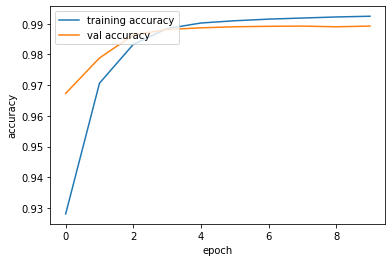

In [0]:
import matplotlib.pyplot as plt 

plt.plot(history.history["acc"],label="training accuracy")
plt.plot(history.history["val_acc"],label="val accuracy")
plt.legend(loc="upper left")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot
score = ltsm.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [0]:
!pip install seqeval
!pip install sklearn_crfsuite

  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7424 sha256=156a8822fb7b5daf6738d7e0506da0ac602dfa69f6ee189a1f5970f14097783e
  Stored in directory: /root/.cache/pip/wheels/4f/32/0a/df3b340a82583566975377d65e724895b3fad101a3fb729f68
Successfully built seqeval
     |████████████████████████████████| 757kB 2.0MB/s 


In [0]:
idx2tag = {i: w for w, i in tag_to_code.items()}

def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(list(idx2tag.values())[p_i].replace("PAD", "O"))
        out.append(out_i)
    return out

In [0]:
test_pred = ltsm.predict(x_val, verbose=1)   
pred_labels = pred2label(test_pred)
test_labels = pred2label(y_val)

8795/8795 [==============================] - 20s 2ms/step


In [0]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
from  sklearn_crfsuite.metrics import flat_classification_report  

print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))

F1-score: 94.7%


In [0]:
report = flat_classification_report(y_pred=pred_labels, y_true=test_labels)
print(report)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       B-art       0.91      0.80      0.85      5000
       B-eve       0.00      0.00      0.00        66
       B-geo       0.97      0.99      0.98    220977
       B-gpe       0.81      0.81      0.81      9380
       B-nat       0.79      0.57      0.66      1494
       B-org       0.79      0.66      0.72      1828
       B-per       0.90      0.91      0.91      4145
       B-tim       0.66      0.53      0.59      4104
       I-art       0.00      0.00      0.00       100
       I-eve       0.71      0.05      0.10        96
       I-geo       0.81      0.71      0.75      4058
       I-gpe       0.86      0.81      0.84      4134
       I-nat       0.00      0.00      0.00        83
       I-org       0.70      0.49      0.58      5020
       I-per       0.00      0.00      0.00        64
       I-tim       0.00      0.00      0.00        48
           O       1.00      1.00      1.00    970703

    accuracy              

**Respuesta**: Se observan resultados bastante favorables en términos de *accuracy* y *loss*. Pero ya que la cantidad de instancias por tag está bastante distribuída habiendo diferencias de bastantes órdenes de magnitud, se necesitan métricas más granulares. El `F1 score` es un valor que nos dice el porcentaje de predicciones correctas. En este caso el promedio fue de $94.5\%$, pero sería mejor revisar qué ocurre con cada *tag*, por lo que se usó el `flat_classification_report`, que entrega datos como: 

*Precision:* Porcentaje de predicciones correctas (considerando verdaderos y falsos positivos)

*Recall:* Porcentaje de positivos correctamente identificados (considerando verdaderos positivos y falsos negativos)

*F1 score*: Ya explicado, pero utiliza los valores de *precision* y *recall*

*Support*: Cantidad de instancias por clase.

Se puede notar que las clases con más instancias tienen resultados bastante decentes en los 3 parámetros. Pero si el número de instancias es particularmente bajo (menos de 100) los resultados son totalmente erróneos, habiendo 0 de `precision`, `recall` y `f1 score` en un par de clases. Si tratamos todas las clases como iguales esto nos da valores bastante mediocres en las 3 métricas como se puede apreciar en la fila `macro avg`, por lo que dependiendo cómo se mire, el modelo puede ser muy bueno, si nos basamos en la mayor cantidad de instancias correctamente identificadas (en este caso, todas las predicciones del tag '0' fueron correctas); o muy malo si nos fijamos en algunas clases menores.

#### 1.f Comparación con otras aproximaciones. 

Ahora entrenaremos dos redes más para comparar los desempeños de la red recurrente. Para esto entrenaremos una red convolucional 1-dimensional y una red densa. Discuta las diferencias entre ambas redes y la red recurrente, y cual cree a priori se adecua mejor a la naturaleza del problema. 

**Respuesta**: Cada uno de estos tipos de redes se diferencian en la aproximación que utilizan para establecer un modelo de predicción. Para efectos de este problema, los 3 tipos sirven. Dado que en la red el input se trata de varios arreglos de números, una red densa será capaz de aprender relaciones entre estos números y sus tags, para luego obtener un vector final que será interpretado por la capa densa con `softmax` para determinar el tag al que pertenece cada palabra de la secuencia, de manera similar a como en la Tarea 1 se determinaba el logaritmo del precio de una propiedad considerando el mapeo de varias características. La red convolucional de una dimensión determinará, mediante filtros, patrones entre los `lemmas` y sus tags correspondientes, considerando también los `lemmas` cercanos, para luego entregar un vector de probabilidades que representará el `tag`. Por ejemplo, si un `lemma` $l_1$ está cercano a los lemmas $l_2$ y $l_3$ con tags $t_2$ y $t_3$ entonces los filtros podrán determinar que $l_1$ tiene tag $t_1$. La red LSTM, mediante la noción de memoria, identificará estructuras semánticas en cada secuencia de `lemmas`. Intuitivamente, ya que para efectos de la red se trata de un problema numérico, la red densa debería tener mejores resultados por su simpleza.

Defina y entrene luego las redes con la misma primera capa de encodding y las siguientes configuraciones:
* Convolucional: 2 capas conv1d con 128 filtros y kernel de tamaño 5
* Densa: 2 capas densas de 128 unidades

Compare los desempeños de las 3 redes en el problema su métrica preferida

In [0]:
from keras.layers import Conv1D, Embedding
from keras.models import Sequential
from keras.layers import Dense

conv = Sequential()

embedding_dim = 100
conv.add(Embedding(input_dim=n_lemmas, output_dim=embedding_dim, input_length=max_len))
conv.add(Conv1D(128, 5, activation='relu', padding='same'))
conv.add(Conv1D(128, 5, activation='relu', padding='same'))
conv.add(Dense(n_tags, activation="softmax"))

conv.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = conv.fit(x_tr,y_tr, validation_data=(x_val,y_val), epochs=0, batch_size=128)
conv.summary()
history = conv.fit(x_tr,y_tr, validation_data=(x_val,y_val), epochs=10, batch_size=128)

Train on 26382 samples, validate on 8795 samples
Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_32 (Embedding)     (None, 140, 100)          2023900   
_________________________________________________________________
conv1d_94 (Conv1D)           (None, 140, 128)          64128     
_________________________________________________________________
conv1d_95 (Conv1D)           (None, 140, 128)          82048     
_________________________________________________________________
dense_13 (Dense)             (None, 140, 18)           2322      
Total params: 2,172,398
Trainable params: 2,172,398
Non-trainable params: 0
_________________________________________________________________
Train on 26382 samples, validate on 8795 samples
Epoch 1/10
26382/26382 [==============================] - 3s 116us/step - loss: 0.2401 - acc: 0.9675 - val_loss: 0.0683 - val_acc: 0.9792
Epoch

In [0]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
from  sklearn_crfsuite.metrics import flat_classification_report  

test_pred = conv.predict(x_val, verbose=1)   
pred_labels = pred2label(test_pred)
test_labels = pred2label(y_val)
print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))

8795/8795 [==============================] - 0s 49us/step
F1-score: 95.3%


In [0]:
report = flat_classification_report(y_pred=pred_labels, y_true=test_labels)
print(report)

              precision    recall  f1-score   support

       B-art       0.89      0.86      0.88      5000
       B-eve       0.57      0.12      0.20        66
       B-geo       0.98      0.99      0.98    220977
       B-gpe       0.83      0.83      0.83      9380
       B-nat       0.71      0.71      0.71      1494
       B-org       0.80      0.68      0.74      1828
       B-per       0.94      0.90      0.92      4145
       B-tim       0.69      0.55      0.61      4104
       I-art       0.39      0.14      0.21       100
       I-eve       0.57      0.22      0.32        96
       I-geo       0.82      0.76      0.79      4058
       I-gpe       0.83      0.82      0.83      4134
       I-nat       0.47      0.11      0.18        83
       I-org       0.72      0.59      0.64      5020
       I-per       0.00      0.00      0.00        64
       I-tim       0.96      0.46      0.62        48
           O       1.00      1.00      1.00    970703

    accuracy              

In [0]:
from keras.layers import Flatten

dense = Sequential()

embedding_dim = 100
dense.add(Embedding(input_dim=n_lemmas, output_dim=embedding_dim, input_length=max_len))
dense.add(Dense(128, activation='relu'))
dense.add(Dense(128, activation='relu'))
dense.add(Dense(n_tags, activation="softmax"))

dense.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = dense.fit(x_tr,y_tr, validation_data=(x_val,y_val), epochs=0, batch_size=128)
dense.summary()
history = dense.fit(x_tr,y_tr, validation_data=(x_val,y_val), epochs=10, batch_size=128)


Train on 26382 samples, validate on 8795 samples
Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, 140, 100)          2023900   
_________________________________________________________________
dense_9 (Dense)              (None, 140, 128)          12928     
_________________________________________________________________
dense_10 (Dense)             (None, 140, 128)          16512     
_________________________________________________________________
dense_11 (Dense)             (None, 140, 18)           2322      
Total params: 2,055,662
Trainable params: 2,055,662
Non-trainable params: 0
_________________________________________________________________
Train on 26382 samples, validate on 8795 samples
Epoch 1/10
26382/26382 [==============================] - 2s 90us/step - loss: 0.4261 - acc: 0.9623 - val_loss: 0.0604 - val_acc: 0.9845
Epoch 

In [0]:
test_pred = dense.predict(x_val, verbose=1)   
pred_labels = pred2label(test_pred)
test_labels = pred2label(y_val)
print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))

8795/8795 [==============================] - 1s 71us/step
F1-score: 93.2%


In [0]:
report = flat_classification_report(y_pred=pred_labels, y_true=test_labels)
print(report)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       B-art       0.86      0.79      0.82      5000
       B-eve       0.67      0.15      0.25        66
       B-geo       0.96      0.99      0.98    220977
       B-gpe       0.77      0.81      0.79      9380
       B-nat       0.64      0.11      0.19      1494
       B-org       0.55      0.52      0.54      1828
       B-per       0.93      0.91      0.92      4145
       B-tim       0.54      0.17      0.25      4104
       I-art       0.50      0.22      0.31       100
       I-eve       0.67      0.17      0.27        96
       I-geo       0.70      0.63      0.66      4058
       I-gpe       0.71      0.67      0.69      4134
       I-nat       0.00      0.00      0.00        83
       I-org       0.73      0.39      0.51      5020
       I-per       0.00      0.00      0.00        64
       I-tim       0.49      0.44      0.46        48
           O       1.00      1.00      1.00    970703

    accuracy              

**Resultados**: De las 3 redes, la densa parece ser la peor, ya que entrega un `F1 score` de $93.2\%$ y además se observan los mismo problemas que en la red LSTM respecto a las clases con menos ocurrencias. La red convolucional 1-dimensional parece ser la con mejores resultados mostrando un `F1 score` de $95.2\%$ (LSTM obtuvo $94.7\%$). A nivel macro entre clases se observa una precisión mayor pero a costa de un *recall* ligeramente menor. El `F1 score` parece estar mejor distribuído entre las clases, pero al mismo tiempo es ligeramente menor en las clases con más instancias, aunque ahora las clases (a excepción de `I-per`) con menos ocurrencias tienen un `F1 score` ligeramente mejor. Al parecer las 3 redes tienen problemas para identificar correctamente todas las clases cuando el número de ocurrencias varía demasiado, pero al menos las exploradas en esta pregunta lo hacen en un tiempo mucho menor.

#### 1.g Red más profunda o bidireccional

Una pregunta natural que surge es saber que ocurre al aumentar la profundidad de la red, o por ejemplo porqué solo se recorre el _input_ en la dirección original. Considerando el tiempo acotado de este semestre, pueden elegir realizar una de las dos exploraciones solamente. 

* Profundidad: Entrene un par de redes con más capas LSTM y grafique como se comporta el desempeño a medida se aumenta la profundidad
* Bidireccional: Varie la cantidad de unidades (a lo menos 4 valores distintos) de la capa LSTM y compare con la red utilizando capas LSTM bidireccionales (como muestra el código). Comente sobre el número de parámetros en ambos casos.

**Respuesta**: En todas las redes el número de parámetros es el mismo para la capa de *Embedding*, que se explica por la cantidad de *lemmas* multiplicada por la dimensión de *embedding*: $20239$ x $100 = 2023900$. El número de parámetros de la capa  LSTM está dado por la siguiente fórmula: `params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)`. Reemplazando, en la primera red se tiene `params =` $4*(101*128 + 128^2)$ = $117248$. En la capa densa esto está determinado por `params = n_tags*lstm_units + n_tags`. Para el primer caso, reemplazando se tiene `params = ` $18*128 + 18$ = $2322$. Esto se mantiene para todos los casos, por lo que el número de neuronas de la capa LSTM afectará tanto su número de parámetros como el de la capa densa. En la capa Bidireccional LSTM se usa la misma fórmula que en LSTM pero se multiplica el resultado por 2 debido a su bidireccionalidad:  $2*4*(101*128 + 128^2)$ = $234496$. Notar que la capa de *embedding* almacena gran parte de los parámetros entrenables y esto se mantiene constante al menos en los primeros casos y en la red bidireccional.

In [0]:
def customUnits(value):
  for i in range(value):
    units = Sequential()

    embedding_dim = 100
    units.add(Embedding(input_dim=n_lemmas, output_dim=embedding_dim, input_length=max_len))

    units.add(LSTM(units=2**(i+7),return_sequences=True)) # You can use CuDNNLSTM if you have a CUDA enabled GPU for faster performance

    units.add(Dense(n_tags, activation='softmax'))

    units.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    units.summary()
    history = units.fit(x_tr,y_tr, validation_data=(x_val,y_val), epochs=10, batch_size=128)
    test_pred = units.predict(x_val, verbose=1)   
    pred_labels = pred2label(test_pred)
    test_labels = pred2label(y_val)
    print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))
    report = flat_classification_report(y_pred=pred_labels, y_true=test_labels)
    print(report)

In [0]:
customUnits(4)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 140, 100)          2023900   
_________________________________________________________________
lstm_4 (LSTM)                (None, 140, 128)          117248    
_________________________________________________________________
dense_4 (Dense)              (None, 140, 18)           2322      
Total params: 2,143,470
Trainable params: 2,143,470
Non-trainable params: 0
_________________________________________________________________
Train on 26382 samples, validate on 8795 samples
Epoch 1/10
26382/26382 [==============================] - 61s 2ms/step - loss: 0.3848 - acc: 0.9318 - val_loss: 0.1565 - val_acc: 0.9672
Epoch 2/10
26382/26382 [==============================] - 60s 2ms/step - loss: 0.1096 - acc: 0.9715 - val_loss: 0.0781 - val_acc: 0.9788
Epoch 3/10
26382/26382 [===========================

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       B-art       0.92      0.80      0.85      5000
       B-eve       0.00      0.00      0.00        66
       B-geo       0.97      0.99      0.98    220977
       B-gpe       0.80      0.83      0.82      9380
       B-nat       0.78      0.60      0.68      1494
       B-org       0.75      0.72      0.73      1828
       B-per       0.93      0.91      0.92      4145
       B-tim       0.75      0.44      0.55      4104
       I-art       0.00      0.00      0.00       100
       I-eve       0.78      0.15      0.25        96
       I-geo       0.82      0.72      0.76      4058
       I-gpe       0.85      0.83      0.84      4134
       I-nat       0.00      0.00      0.00        83
       I-org       0.72      0.47      0.57      5020
       I-per       0.00      0.00      0.00        64
       I-tim       0.00      0.00      0.00        48
           O       1.00      1.00      1.00    970703

    accuracy              

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       B-art       0.95      0.77      0.85      5000
       B-eve       0.09      0.09      0.09        66
       B-geo       0.97      0.99      0.98    220977
       B-gpe       0.82      0.80      0.81      9380
       B-nat       0.80      0.59      0.68      1494
       B-org       0.77      0.71      0.74      1828
       B-per       0.92      0.91      0.91      4145
       B-tim       0.66      0.54      0.59      4104
       I-art       0.00      0.00      0.00       100
       I-eve       0.78      0.15      0.25        96
       I-geo       0.80      0.76      0.78      4058
       I-gpe       0.87      0.83      0.85      4134
       I-nat       0.00      0.00      0.00        83
       I-org       0.64      0.53      0.58      5020
       I-per       0.00      0.00      0.00        64
       I-tim       1.00      0.44      0.61        48
           O       1.00      1.00      1.00    970703

    accuracy              

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       B-art       0.91      0.80      0.85      5000
       B-eve       0.68      0.20      0.31        66
       B-geo       0.97      0.99      0.98    220977
       B-gpe       0.81      0.82      0.82      9380
       B-nat       0.81      0.59      0.68      1494
       B-org       0.83      0.66      0.74      1828
       B-per       0.90      0.91      0.91      4145
       B-tim       0.64      0.57      0.60      4104
       I-art       0.00      0.00      0.00       100
       I-eve       0.80      0.17      0.28        96
       I-geo       0.79      0.76      0.77      4058
       I-gpe       0.80      0.90      0.85      4134
       I-nat       0.29      0.02      0.04        83
       I-org       0.75      0.45      0.56      5020
       I-per       0.00      0.00      0.00        64
       I-tim       0.81      0.44      0.57        48
           O       1.00      1.00      1.00    970703

    accuracy              

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       B-art       0.92      0.80      0.86      5000
       B-eve       0.06      0.12      0.08        66
       B-geo       0.97      0.99      0.98    220977
       B-gpe       0.81      0.82      0.81      9380
       B-nat       0.86      0.55      0.67      1494
       B-org       0.82      0.67      0.73      1828
       B-per       0.93      0.91      0.92      4145
       B-tim       0.69      0.48      0.56      4104
       I-art       0.00      0.00      0.00       100
       I-eve       0.72      0.14      0.23        96
       I-geo       0.83      0.73      0.78      4058
       I-gpe       0.87      0.82      0.85      4134
       I-nat       0.25      0.02      0.04        83
       I-org       0.64      0.52      0.57      5020
       I-per       0.00      0.00      0.00        64
       I-tim       0.86      0.52      0.65        48
           O       1.00      1.00      1.00    970703

    accuracy              

In [0]:
from keras.layers import Bidirectional
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense

model = Sequential()

embedding_dim = 100
model.add(Embedding(input_dim=n_lemmas, output_dim=embedding_dim, input_length=max_len))

model.add(Bidirectional(LSTM(units=128,return_sequences=True)))

model.add(Dense(n_tags, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()
history = model.fit(x_tr,y_tr, validation_data=(x_val,y_val), epochs=10, batch_size=128)

 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 140, 100)          2023900   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 140, 256)          234496    
_________________________________________________________________
dense_3 (Dense)              (None, 140, 18)           4626      
Total params: 2,263,022
Trainable params: 2,263,022
Non-trainable params: 0
_________________________________________________________________
Train on 26382 samples, validate on 8795 samples
Epoch 1/10
26382/26382 [==============================] - 116s 4ms/step - loss: 0.3166 - acc: 0.9393 - val_loss: 0.1184 - val_acc: 0.9683
Epoch 2/10
26382/26382 [==============================] - 114s 4ms/step - loss: 0.0850 - acc: 0.9759 - val_loss: 0.0628 - val_acc: 0.9830
Epoch 3/10
26382/26382 [=========================

In [0]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
from  sklearn_crfsuite.metrics import flat_classification_report 

test_pred = model.predict(x_val, verbose=1)   
pred_labels = pred2label(test_pred)
test_labels = pred2label(y_val)
print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))
report = flat_classification_report(y_pred=pred_labels, y_true=test_labels)
print(report)

8795/8795 [==============================] - 52s 6ms/step
F1-score: 95.2%


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       B-art       0.88      0.88      0.88      5000
       B-eve       0.61      0.17      0.26        66
       B-geo       0.98      0.99      0.98    220977
       B-gpe       0.83      0.84      0.83      9380
       B-nat       0.80      0.65      0.72      1494
       B-org       0.72      0.73      0.73      1828
       B-per       0.95      0.90      0.92      4145
       B-tim       0.60      0.60      0.60      4104
       I-art       0.17      0.01      0.02       100
       I-eve       0.69      0.11      0.20        96
       I-geo       0.83      0.76      0.80      4058
       I-gpe       0.88      0.76      0.82      4134
       I-nat       0.00      0.00      0.00        83
       I-org       0.68      0.62      0.65      5020
       I-per       0.00      0.00      0.00        64
       I-tim       0.93      0.27      0.42        48
           O       1.00      1.00      1.00    970703

    accuracy              

**Resultados**: Se puede observar que aumentar el número de neuronas no afecta mayormente en el rendimiento de la red, tanto a nivel macro como clase a clase. Se obtuvo, para los 4 casos LSTM unidireccionales el mismo `F1 score` a diferencia de la tercera iteración que mejoró en un $0.1\%$. Se siguen apreciando los mismo problemas en las clases con menor ocurrencia, sigue habiendo 0 precisión en el tag `I-per`, aunque las demás aumentaron ligeramente su `F1 score`. Para la capa bidireccional cabe destacar que el tiempo de ejecución es el doble que su contraparte unidireccional, lo cual tiene sentido, y sus resultados son ligeramente mejores, aunque aún se presentan los mismos problemas que en las redes anteriores.

#### 1.h Dimensión del Embedding

Como podrán haber notado, gran parte de los parámetros entrenables se encuentran en el embedding. Elija una de las redes entrenadas anteriormente y varíe la dimensión del embedding en un conjunto de potencias de 2 que le parezca razonable (a lo menos 6 valores). Comente sus observaciones.

In [0]:
from keras.layers import Conv1D, Embedding
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

def customEmbedding(values):
  val_acc_max = [] # maximo accuracy de validacion obtenido
  acc_epoch = []    # accuracy de training obtenido en el mismo epoch que val_acc_max

  for i in range(values):
    conv = Sequential()

    embedding_dim = 2**(i+5)
    conv.add(Embedding(input_dim=n_lemmas, output_dim=embedding_dim, input_length=max_len))
    conv.add(Conv1D(128, 5, activation='relu', padding='same'))
    conv.add(Conv1D(128, 5, activation='relu', padding='same'))
    conv.add(Dense(n_tags, activation="softmax"))

    conv.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = conv.fit(x_tr,y_tr, validation_data=(x_val,y_val), epochs=0, batch_size=128)
    conv.summary()
    history = conv.fit(x_tr,y_tr, validation_data=(x_val,y_val), epochs=10, batch_size=128)
    val_acc_max.append(max(history.history['val_acc']))
    acc_epoch.append(history.history['acc'][history.history['val_acc'].index(max(history.history['val_acc']))])

    test_pred = conv.predict(x_val, verbose=1)   
    pred_labels = pred2label(test_pred)
    test_labels = pred2label(y_val)
    print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))
    report = flat_classification_report(y_pred=pred_labels, y_true=test_labels)
    print(report)
  
  plt.plot(val_acc_max,label="max val accuracy")
  plt.plot(acc_epoch,label="training accuracy")
  plt.legend(loc="upper left")
  plt.ylabel('accuracy')
  plt.xlabel('2^{embedding dimension + 5}')
  plt.plot

Train on 26382 samples, validate on 8795 samples
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 140, 32)           647648    
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 140, 128)          20608     
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 140, 128)          82048     
_________________________________________________________________
dense_9 (Dense)              (None, 140, 18)           2322      
Total params: 752,626
Trainable params: 752,626
Non-trainable params: 0
_________________________________________________________________
Train on 26382 samples, validate on 8795 samples
Epoch 1/10
26382/26382 [==============================] - 2s 90us/step - loss: 0.2923 - acc: 0.9588 - val_loss: 0.0828 - val_acc: 0.9748
Epoch 2/10

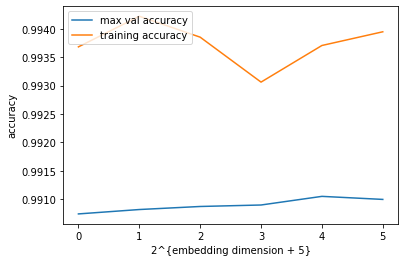

In [0]:
customEmbedding(6)

**Respuesta**: Se eligieron potencias de 2 entre 32 y 1024. Se eligio una red convolucional unidimensional por su calidad obtenida en las preguntas anteriores. En cuanto a *accuracy*, se mantuvieron los buenos resultados en cada una de sus iteraciones, variando ligeramente de forma ascendente y obteniendo el mejor valor en la penúltima iteración. Analizando más granularmente, el `F1 score` se mantuvo en valores alrededor del $94$ y $95$ por ciento. Clase a clase se observa que en las últimas iteraciones efectivamente se pudieron obtener métricas mayores a 0 para el tag `B-per` que ha sido el más problemático en esta pregunta. Los valores de *precision*, *recall* y *f1 score* macro por clases superaron la marca del $60\%$. Aunque hay menos clases con un `F1 score` perfecto, al menos en las últimas 2 iteraciones se alcanzaron los valores más decentes considerando todas las clases.

#### 1.i Escribamos palabras - Datasest

Ahora buscaremos otra aplicación a las redes recurrentes, predecir el caracter siguiente. Si logramos entrenar una red que sea buena en esta tarea, podremos escribir texto automáticamente, pues podemos, a partir de una frase, predecir el caracter siguiente, y luego introducir la nueva frase sin el primer caracter en la red nuevamente, e iterando así escribir automáticamente. Si bien las redes recurrentes son adecuadas para esta tarea, no pretendemos entrenar un _Shakespeare_ en esta tarea, sin embargo es interesante investigar qué tan verosimil o no puede lograr ser el texto generado. 

Para esto, primero crearmos nuestro nuevo dataset. Para esta tarea preferiremos unir todas las frases en un solo gran corpus y luego crear nuevas secuencias semi redundantes. Esto nos evita primero el problema de tener que hacer padding, pues crearemos todas las entradas iguales, pero también nos permite aprovechar mejormente el dataset, de cierta forma aumentando el número de datos. El _target_ en este caso será solo el caracter siguiente correspondiente a cada secuencia. 

En este item debe cargar el dataset, completando el código propuesto abajo. 

In [0]:
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical

df_w = pd.read_csv(os.path.join("ner.csv"), engine='python', error_bad_lines=False)

df_w = df_w.dropna()[['word']]

corpus = ' '.join(list(df_w.word.values)).lower()

sentence_length = 40
steps = 5

sentences = []
next_char = []

for i in range(0,len(corpus) - sentence_length - 1 , steps):
  sentences.append(corpus[i:sentence_length+i])
  next_char.append(corpus[sentence_length+i])

chars_to_code = {char:code for code, char in enumerate(set(corpus))}
code_to_chars = {code:char for char,code in chars_to_code.items()}

x = pd.np.array([[chars_to_code[char] for char in sentence] for sentence in sentences])
y = pd.np.array([chars_to_code[char] for char in next_char])
y = to_categorical(y)

Skipping line 281837: Expected 25 fields in line 281837, saw 34


In [0]:
print(x.shape)
print(y.shape)
print(len(chars_to_code))

(1213495, 40)
(1213495, 60)
60


#### 1.j Escribamos palabras - Red

Entrene ahora una red con estos datos utilizando GRU. El resto de la estructura queda a su elección. Evalue el desempeño de su red evaluando qué tan bien genera texto, puede utilizar las funciones propuestas como `callback` para ver como progresa su red. Pruebe a lo menos 2 estructuras distintas. 

Una vez esté satisfecho de su red, hagala escribir algunos textos a partir de textos semilla elegidos por usted. Describa sus observaciones. ¿Qué cree ocurriría si entrenamos la red con otro dataset?

In [0]:
from keras.layers import Conv1D, Embedding
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import CuDNNGRU
from keras.callbacks import LambdaCallback
from keras.optimizers import RMSprop
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import random
import sys

def predict_char(model, sentence):
    x = [chars_to_code[char] for char in sentence]
    x = pad_sequences([x], maxlen=sentence_length, padding='pre', value=0)
    probas = model.predict(x)[0]
    next_index = np.random.choice(len(chars_to_code), p=probas)
    return code_to_chars[next_index]

def on_epoch_end(epoch, logs):
    print(f'\n Generating random text for epoch: {epoch}')
    start_index = random.randint(0,x.shape[0]-1)
    sentence = ''.join([code_to_chars[code] for code in x[start_index]])
    print('\n Generating with seed: ' + sentence)
    sys.stdout.write(sentence)
    for i in range(400):
        next_char = predict_char(character, sentence)
        sentence = sentence[1:] + next_char #for next character
        sys.stdout.write(next_char)
        sys.stdout.flush()
    return

print_text_callback = LambdaCallback(on_epoch_end=on_epoch_end)

character = Sequential()
embedding_dim = 100
character.add(Embedding(input_dim=x.shape[1], output_dim=embedding_dim, input_length=x.shape[1]))
character.add(CuDNNGRU(128,return_sequences=True))
character.add(CuDNNGRU(128))
character.add(Dense(y.shape[1],activation='softmax'))

optimizer = RMSprop(lr = 0.01)

character.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
character.fit(x,y, epochs=0, batch_size = 128,callbacks=[print_text_callback])
character.summary()

character.fit(x,y, epochs=35, callbacks=[print_text_callback])

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 40, 100)           4000      
_________________________________________________________________
cu_dnngru_13 (CuDNNGRU)      (None, 40, 128)           88320     
_________________________________________________________________
cu_dnngru_14 (CuDNNGRU)      (None, 128)               99072     
_________________________________________________________________
dense_23 (Dense)             (None, 60)                7740      
Total params: 199,132
Trainable params: 199,132
Non-trainable params: 0
_________________________________________________________________
Epoch 1/35
1213495/1213495 [==============================] - 421s 347us/step - loss: 2.4707 - acc: 0.2957

 Generating random text for epoch: 0

 Generating with seed: hi'ite cleric moqtada al-sadr has return
hi'ite cleric moqtada al-sadr has r

In [0]:
character = Sequential()
embedding_dim = 100
character.add(Embedding(input_dim=len(code_to_chars), output_dim=embedding_dim, input_length=x.shape[1]))
#character.add(CuDNNGRU(128,return_sequences=True))
character.add(CuDNNGRU(256, return_sequences= True))
character.add(CuDNNGRU(256))
character.add(Dense(1000,activation='relu'))
character.add(Dense(len(code_to_chars),activation='softmax'))

optimizer = RMSprop(lr = 0.01)

character.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
character.fit(x,y, epochs=0, batch_size = 128,callbacks=[print_text_callback])
character.summary()

character.fit(x,y, epochs=35, batch_size=128, callbacks=[print_text_callback])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 40, 100)           6000      
_________________________________________________________________
cu_dnngru_3 (CuDNNGRU)       (None, 40, 256)           274944    
_________________________________________________________________
cu_dnngru_4 (CuDNNGRU)       (None, 256)               394752    
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              257000    
_________________________________________________________________
dense_4 (Dense)              (None, 60)                60060     
Total params: 992,756
Trainable params: 992,756
Non-trainable params: 0
_________________________________________________________________
Epoch 1/35
1213495/1213495 [==============================] - 120s 99us/step - loss: 1.4996 - acc: 0.5491

 Genera

In [0]:
sentence = "i forced a bot to watch 1000 hours of "
print('\n Generating with seed: ' + sentence)
sys.stdout.write(sentence)
for i in range(400):
    next_char = predict_char(character, sentence)
    sentence = sentence[1:] + next_char #for next character
    sys.stdout.write(next_char)
    sys.stdout.flush()


 Generating with seed: i forced a bot to watch 1000 hours of 
i forced a bot to watch 1000 hours of somaliu to develop conflict refuses to build its russian restract against interviewing the appread activities at the contempeate the scientists and officialized the problems plot by insoriative swiss foreign investment a plan , where the annual trade across is expected to keep 3.6 percose . officials say china de to $ 55.2,00 in the decision . in the longhua zone has traveled to seeing the muslim 

In [0]:
sentence = "i'm rick harrison and this is my pawn shop"
print('\n Generating with seed: ' + sentence)
sys.stdout.write(sentence)
for i in range(400):
    next_char = predict_char(character, sentence)
    sentence = sentence[1:] + next_char #for next character
    sys.stdout.write(next_char)
    sys.stdout.flush()


 Generating with seed: i'm rick harrison and this is my pawn shop
i'm rick harrison and this is my pawn shopm its poul as a television . sudan 's abidict minoritary security rest on kiest . the move expected games to harm . the world bakakakouf is market than nation 's security surgery , nata if agisro barric took place . he is to run into atthack tileev thursday . the reports say they visit that syrian holy secretary died of the torture during a rally . zata chief government did not said israel 's big 

In [0]:
sentence = "to be fair you have to have a very high iq to understand rick and morty"
print('\n Generating with seed: ' + sentence)
sys.stdout.write(sentence)
for i in range(400):
    next_char = predict_char(character, sentence)
    sentence = sentence[1:] + next_char #for next character
    sys.stdout.write(next_char)
    sys.stdout.flush()


 Generating with seed: to be fair you have to have a very high iq to understand rick and morty
to be fair you have to have a very high iq to understand rick and morty . diveritan breaks in sunni ministry for a blast early 1900 pontiff , jama fina . the iraqi prime ministry spokesman alleavine continued telecontinent disconcrols . the united nations only first hiece court will etate the iraqi young ministers to program and one man 's backyard . officials say israel included violence . u.s. energy secretary officials asked a court help conflictation . the govern

In [0]:
sentence = "real emo only consists of"
print('\n Generating with seed: ' + sentence)
sys.stdout.write(sentence)
for i in range(400):
    next_char = predict_char(character, sentence)
    sentence = sentence[1:] + next_char #for next character
    sys.stdout.write(next_char)
    sys.stdout.flush()


 Generating with seed: real emo only consists of
real emo only consists of pakziden hingu hell-npiting charge . singh were who have offering such a speecing reduction with a lack of attacking challenge . he failed to take up their own reduction . the tripdiment has quick the news agency quict on major terrorists in konday in east africa . chinese portries fled at thank shulkara by the pated that had fired friday prosecutors tried by the move has been asking the scientis

**Respuesta**: La primera red converge en las primeras 15 *epoch*, y luego se mantiene en el mismo valor en las siguientes, por lo que su ejecución fue detenida. Se utilizaron dos capas de GRU y una densa con `softmax` con tantos *outputs* como caracteres posibles. Como optimizador se usó `RMSProp`. Se puede apreciar que la pérdida nunca llega a ser menor que 2, lo que en la práctica puede notarse en varias palabras inexistentes en el idioma ("oopciilsvisnia"). 

La segunda red se utilizó una estructura similar, pero con el doble de neuronas en las capas GRU y agregando una capa densa extra con 1000 neuronas utilizando `relu`. Se alcanzó un *accuracy* de 68% y una pérdida cercana a 1, lo cual según el estado del arte parece relativamente correcto. Esta vez la mayoría de las palabras tienen sentido (con algunas excepciones). Al probar el modelo generando texto con *seeds* distintos de los que contiene el *dataset*, se puede apreciar un cierto *bias* hacia las palabras que contiene el *dataset*. Casi siempre termina mencionando a irak, ataques, guerra, gobiernos, etc. Esto hace concluir que la generación de texto, o más bien, el contexto de los texto generados por una red dependen directamente del dataset utilizado. Si por ejemplo se utilizar el guión de alguna película o serie, el texto generado tendría una estructura similiar en cuanto a palabras utilizadas, nombres de personajes y semántica.



# 2 - Autoencoders en Fashion MNIST

Si bien las redes neuronales han tenido desempeños sorprendentes en muchas áreas donde antes solo un ser humano podía alcanzar buenos desempeños, uno de sus desventajas suele serla alta dimensionalidad de los espacios de hipótesis. En la práctica, esto implica que para aprender una tarea predictiva con alguna capacidad de generalización, se requieren grandes bases de datos etiquetadas. Esto implica un problema, considerando que al momento de buscar la base de datos, no se tiene a priori una manera de automatizar esta etiquetación. Esta necesidad de gran cantidad de trabajo de clasificación realizado por humanos, ha engendrado soluciones ingeniosas, como la aproximación de _Facebook_ hace algunos años de pedirle a los mismos usuarios que etiquetaran a las personas en sus fotos, o la solución de _Amazon_, _Mechanical Turk_, donde cualquier usuario puede realizar tareas repetitivas de clasificación a cambio de dinero real, o por otro lado cualquier persona puede comprar la etiquetación de una base de datos la cual realizan varias personas en cualquier parte del mundo. 

Otra aproximación, quizás aún más ingeniosa, para solucionar el problema de las etiquetas, es utilizar las bases de datos sin preocuparse de sus etiquetas. Esta aproximación de aprendizaje no supervisado tiene su representante en redes neuronales en los _Autoencoders_, redes que utilizan el mismo input como target y buscan representaciones de menor dimensionalidad al interior de la red. Estas redes han permitido el uso de cantidades masivas de datos para aprender de ellos sin necesidad de tener etiquetas. Durante esta pregunta veremos algunos de los aspectos y posibilidades básicas que nos presentan los _autoencoders_, utilizando una base de datos de imagenes de articulos de vestimenta, el Fashion MNIST. 

### 2.a Carga de datos y visualizaciones
Cargue los datos. Puede user las funciones de `keras.datasets` como muestra el código o descargarlo manualmente. 

Luego, visualice algunas imagenes de cada una de las catégorias junto con sus nombres (investigue un poco para encontrar la codificación de `y`). Note que las imagenes deben representarse en blanco y negro, puede usar `cmap='Greys'`. ¿Qué pares de categorías cree podrían ocasionar problemas al momento de clasificación? ¿Qué tan bien cree que se desempeñaría un humano en esta tarea?

Using TensorFlow backend.


4423680/4422102 [==============================] - 2s 0us/step


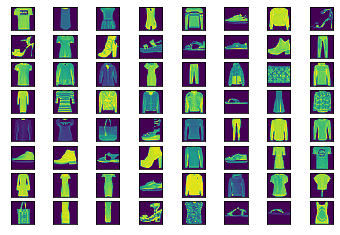

In [0]:
from keras.datasets import fashion_mnist
(x_train,y_train),(x_val,y_val) = fashion_mnist.load_data()

import matplotlib.pyplot as plt

ix = 1
square = 8

for u in range(square):
  for v in range(square):
    ax = plt.subplot(square,square,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(x_train[ix])
    ix += 1
plt.show()

Shirt, t-shirt y top son faciles de confundir, también sneaker con ankle boot. Dado que las imágenes están en escala de grises y en una resolución baja, un humano tendria problemas clasificando esas categorías.

### 2.b Posibilidades de preprocesamiento y pequeños análisis. 

¿Cuáles son los rangos de valores de `x`? ¿Por qué?

¿Las distintas clases de ejemplos están balanceadas?

¿Considera necesario realizar un preprocesamiento? Escale los valores de `x` al intervalo $[0,1]$, y guarde el conjunto de datos original de igual manera que el escalado. ¿Se pierde información al realizar este preprocesamiento? 

Las primeras redes que entrenaremos utilizarán arquitecturas _fully connected_, por lo cual también es necesario transformar nuestras imagenes 2-dimensionales a vectores, como muestra el ejemplo de código.

In [0]:
import numpy as np
np.min(x_train),np.max(x_train)

(0, 255)

x se mueve entre 0 y 255. Es necesario entonces escalar, es posible que algunos pixeles se muevan dentro de valores bajos (como los bordes, donde no hay ropa) y otros muy altos (en el centro de la imagen, donde si hay ropa). Esto puede traer problemas de aprendizaje en la red, por lo cual se escalará a escala $[0,1]$. No perdemos información al hacer esto. De hecho podemos volver a la escala original sin problemas multiplicando por 255.

In [0]:

x_train_vector = x_train.reshape(-1,28*28)
x_val_vector = x_val.reshape(-1,28*28)
x_train_vector.shape

(60000, 784)

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train_vector)
x_train_vector_scaled=scaler.transform(x_train_vector)
x_val_vector_scaled=scaler.transform(x_val_vector)

In [0]:
print(np.where(y_train==0)[0].size)
print(np.where(y_train==1)[0].size)
print(np.where(y_train==2)[0].size)
print(np.where(y_train==3)[0].size)
print(np.where(y_train==4)[0].size)
print(np.where(y_train==5)[0].size)
print(np.where(y_train==6)[0].size)
print(np.where(y_train==7)[0].size)
print(np.where(y_train==8)[0].size)
print(np.where(y_train==9)[0].size)


6000
6000
6000
6000
6000
6000
6000
6000
6000
6000


Las clases están perfectamente balanceadas.

### 2.c Primer Autoencoder

Entrenaremos un primer autoencoder de una capa oculta, usando arquitectura densa. Para esto, utilize como guía los códigos presentados abajo. 

Utilice en primera instancia su conjunto de datos escalados. Considerando el intervalo de los datos escalados, ¿Qué función de activación correspondería a la capa de salida de la red? ¿Debería afectar la elección de la función de activación de la capa oculta? 

Entrene esta primera red utilizando pérdida _binary cross entropy_. Compare luego las imagenes originales con las imagenes reconstruidas, como muestra el código. ¿Qué le parece el desempeño de la red, logra aprender la tarea en su opinion? Grafique como varia la pérdida a lo largo del entrenamiento y visualice algunas imagenes reconstruidas. 

Los datos escalados se mueven entre 0 y 1, por lo tanto es razonable usar una función sigmoidal (la cual también entrega valores entre 0 y 1) y usar cross entropy como función de perdida. Como función en la capa escondida usaremos Relu, esperando que al añadir esparcisidad a la red aumente nuestro performance.

In [0]:
from keras.layers import Dense
from keras.optimizers import SGD
from keras.models import Sequential

autoencoder = Sequential()

autoencoder.add(Dense(32,activation='relu')) # encoder
 
autoencoder.add(Dense(28*28,activation= 'sigmoid')) #decoder

autoencoder.compile(optimizer=SGD(lr=0.002),loss='binary_crossentropy')
autoencoder.fit(x_train_vector_scaled,x_train_vector_scaled,epochs=50,validation_data=(x_val_vector_scaled,x_val_vector_scaled))







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/50





60000/60000 [==============================] - 14s 228us/step - loss: 0.6948 - val_loss: 0.6932
Epoch 2/50
60000/60000 [==============================] - 4s 74us/step - loss: 0.6920 - val_loss: 0.6909
Epoch 3/50
60000/60000 [==============================] - 4s 73us/step - loss: 0.6898 - val_loss: 0.6885
Epoch 4/50
60000/60000 [==============================] - 4s 72us/step - loss: 0.6871 - val_loss: 0.6854
Epoch 5/50
60000/60000 [==============================] - 4s 72us/step - loss: 0.6833 - val_loss: 0.6809
Epoch 6/50
60000/60000 [==============================] - 4s 72us/step - loss: 0.6777 - val_loss: 0.6741
Epoch 7/50
60000/60000 [==============================] - 4s 73us/step - loss: 0.6694 - val_loss: 0.6641
Epoch 8/50
60000/60000 [==============================] - 4s 74us/step - loss: 0.6574 - val_loss: 0.6501
E

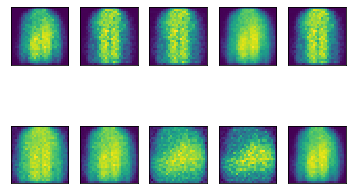

In [0]:
ix = 1
for u in range(5):
  for v in range(2):
    ax = plt.subplot(2,5,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(autoencoder.predict(x_val_vector_scaled)[ix].reshape(28,28))
    ix += 1
plt.show()

Podemos ver que aunque se alcancen valores bajos de perdida (0.4722) estos no son suficientes, ya que la red no es capaz de reconstruir bien las imágenes del conjunto de validación, retornando solo camisas.

### 2.d Sin escalar
Entrene nuevamente la misma estructura de red pero esta vez utilizando los datos originales (sin escalar). ¿Qué función de activación debe utilizar para la capa de salida? ¿Le parece sea una buena aproximación comparando con las caracteristicas de la red anterior? 

Compare los desempeños viendo las imagenes reconstruidas. 

De aquí en adelante prefiera la versión de los datos escaladas para consistencia. 

In [0]:
x_train_vector.min(),x_train_vector.max()

(0, 255)

Como los datos sin escalar se mueven entre 0 y 255, usaremos una salida lineal y funcion de perdida mse.

In [0]:

autoencoder = Sequential()

autoencoder.add(Dense(32,activation='relu')) # encoder
 
autoencoder.add(Dense(28*28)) #decoder

autoencoder.compile(optimizer=SGD(lr=0.002),loss='mse')
autoencoder.fit(x_train_vector,x_train_vector,epochs=50,validation_data=(x_val_vector,x_val_vector))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 93us/step - loss: 13627.2203 - val_loss: 13280.5938
Epoch 2/50
60000/60000 [==============================] - 5s 87us/step - loss: 13204.9523 - val_loss: 13135.9380
Epoch 3/50
60000/60000 [==============================] - 5s 89us/step - loss: 13061.9281 - val_loss: 12994.0217
Epoch 4/50
60000/60000 [==============================] - 5s 90us/step - loss: 12921.6149 - val_loss: 12854.7926
Epoch 5/50
60000/60000 [==============================] - 5s 88us/step - loss: 12783.9607 - val_loss: 12718.1989
Epoch 6/50
60000/60000 [==============================] - 5s 85us/step - loss: 12709.9064 - val_loss: 12584.4548
Epoch 7/50
60000/60000 [==============================] - 5s 85us/step - loss: 12516.6424 - val_loss: 12452.9821
Epoch 8/50
60000/60000 [==============================] - 5s 84us/step - loss: 12386.7096 - val_loss: 12323.9961
Epoch 9/50
60000/60000 [======================

Las perdidas obtenidas son extravagantemente grandes, lo cual reafirma que estandarizar los datos es necesario para el buen funcionamiento de una red neuronal.

__Usando mse:__ Un approach que se nos ocurrió usar para expandir las preguntas anteriores es que pasa si usamos una salida lineal y mse como función de perdida, pero esta vez usando los datos escalados, esperando que la red encuentre los pesos necesarios para que las salidas se muevan entre 0 y 1. Abajo aparecen los resultados.

In [0]:
from keras.layers import Dense
from keras.optimizers import SGD
from keras.models import Sequential

autoencoder = Sequential()

autoencoder.add(Dense(32,activation='relu')) # encoder
 
autoencoder.add(Dense(28*28)) #decoder

autoencoder.compile(optimizer=SGD(lr=0.002),loss='mse')
autoencoder.fit(x_train_vector_scaled,x_train_vector_scaled,epochs=50,validation_data=(x_val_vector_scaled,x_val_vector_scaled))








Train on 60000 samples, validate on 10000 samples
Epoch 1/50





60000/60000 [==============================] - 13s 213us/step - loss: 0.2070 - val_loss: 0.2024
Epoch 2/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.1989 - val_loss: 0.1950
Epoch 3/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.1891 - val_loss: 0.1819
Epoch 4/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.1716 - val_loss: 0.1595
Epoch 5/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.1449 - val_loss: 0.1294
Epoch 6/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.1149 - val_loss: 0.1012
Epoch 7/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.0914 - val_loss: 0.0829
Epoch 8/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.0779 - val_loss: 0.0735
Epoch 9/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.0714 - val_loss

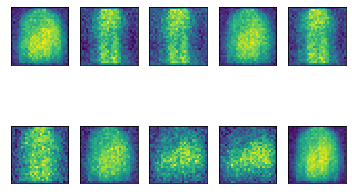

In [0]:
ix = 1
for u in range(5):
  for v in range(2):
    ax = plt.subplot(2,5,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(autoencoder.predict(x_val_vector_scaled)[ix].reshape(28,28))
    ix += 1
plt.show()

Las perdidas son hasta 10 veces más bajas que al usar sigmoidal, alcanzando una perdida de 0.0527. Usaremos esta red para el siguiente item. 

### 2.e Dimensionalidad

Una forma de interpretar lo que realiza el autoencoder, es considerar que si el autoencoder hace bien su tarea, la información necesaria para reconstruir la imagen original se encuentra en la capa oculta, la cual tiene menor dimensionalidad que la imagen original. Uno puede considerar por lo tanto que la capa de _encoding_ esta comprimiendo la información contenida en la imagen, mientras la capa de _decoding_ hace el proceso contrario, descomprimiendola a su estado original lo mejor posible. 

Explore como cambia el desempeño de la red en cuestión frente a cambios en la dimensión de la capa oculta. Pruebe a lo menos 5 niveles de compresión distintos, incluyendo uno donde la capa oculta tenga $50\%$ de ratio de compresión y otro donde la capa oculta tenga tan solo 2 neuronas. ¿Qué observa?

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 82us/step - loss: 0.2071 - val_loss: 0.1543
Epoch 2/50
60000/60000 [==============================] - 4s 73us/step - loss: 0.1250 - val_loss: 0.1012
Epoch 3/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.0893 - val_loss: 0.0807
Epoch 4/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.0772 - val_loss: 0.0741
Epoch 5/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.0727 - val_loss: 0.0710
Epoch 6/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.0701 - val_loss: 0.0688
Epoch 7/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.0681 - val_loss: 0.0670
Epoch 8/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.0664 - val_loss: 0.0653
Epoch 9/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.0648 - val_loss: 0.0638
Epoch

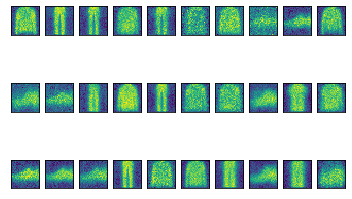

In [0]:

autoencoder = Sequential()

autoencoder.add(Dense(int(28*28*0.7),activation='relu')) # encoder
 
autoencoder.add(Dense(28*28)) #decoder

autoencoder.compile(optimizer=SGD(lr=0.002),loss='mse')
history=autoencoder.fit(x_train_vector_scaled,x_train_vector_scaled,epochs=50,validation_data=(x_val_vector_scaled,x_val_vector_scaled))
ix = 1
for u in range(10):
  for v in range(3):
    ax = plt.subplot(3,10,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(autoencoder.predict(x_val_vector_scaled)[ix].reshape(28,28))
    ix += 1
plt.show()

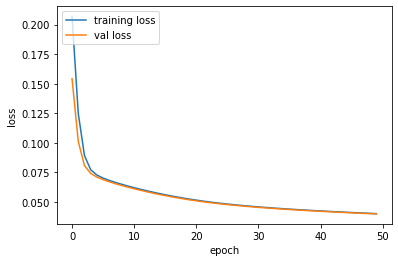

In [0]:
if (len(history.history["loss"])==50):
        plt.plot(history.history["loss"],label="training loss")
        plt.plot(history.history["val_loss"],label="val loss")
        plt.legend(loc="upper left")
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.plot

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 81us/step - loss: 0.2084 - val_loss: 0.1622
Epoch 2/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.1346 - val_loss: 0.1104
Epoch 3/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.0958 - val_loss: 0.0846
Epoch 4/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.0795 - val_loss: 0.0753
Epoch 5/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.0735 - val_loss: 0.0715
Epoch 6/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.0706 - val_loss: 0.0693
Epoch 7/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.0687 - val_loss: 0.0676
Epoch 8/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.0671 - val_loss: 0.0661
Epoch 9/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.0657 - val_loss: 0.0648
Epoch

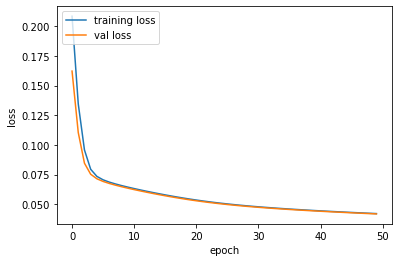

In [0]:
autoencoder = Sequential()

autoencoder.add(Dense(int(28*28*0.5),activation='relu')) # encoder
 
autoencoder.add(Dense(28*28)) #decoder

autoencoder.compile(optimizer=SGD(lr=0.002),loss='mse')
history2=autoencoder.fit(x_train_vector_scaled,x_train_vector_scaled,epochs=50,validation_data=(x_val_vector_scaled,x_val_vector_scaled))
if (len(history2.history["loss"])==50):
        plt.plot(history2.history["loss"],label="training loss")
        plt.plot(history2.history["val_loss"],label="val loss")
        plt.legend(loc="upper left")
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.plot

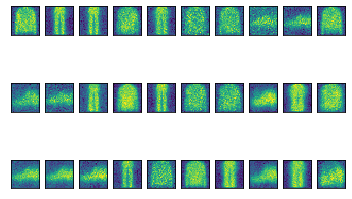

In [0]:
ix = 1
for u in range(10):
  for v in range(3):
    ax = plt.subplot(3,10,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(autoencoder.predict(x_val_vector_scaled)[ix].reshape(28,28))
    ix += 1
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 83us/step - loss: 0.2122 - val_loss: 0.1820
Epoch 2/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.1617 - val_loss: 0.1407
Epoch 3/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.1212 - val_loss: 0.1036
Epoch 4/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.0923 - val_loss: 0.0831
Epoch 5/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.0785 - val_loss: 0.0746
Epoch 6/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.0729 - val_loss: 0.0711
Epoch 7/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.0704 - val_loss: 0.0693
Epoch 8/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.0689 - val_loss: 0.0681
Epoch 9/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.0679 - val_loss: 0.0671
Epoch

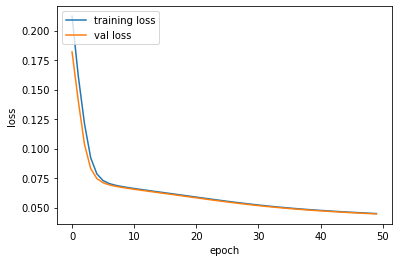

In [0]:
autoencoder = Sequential()

autoencoder.add(Dense(int(28*28*0.3),activation='relu')) # encoder
 
autoencoder.add(Dense(28*28)) #decoder

autoencoder.compile(optimizer=SGD(lr=0.002),loss='mse')
history3=autoencoder.fit(x_train_vector_scaled,x_train_vector_scaled,epochs=50,validation_data=(x_val_vector_scaled,x_val_vector_scaled))
if (len(history3.history["loss"])==50):
        plt.plot(history3.history["loss"],label="training loss")
        plt.plot(history3.history["val_loss"],label="val loss")
        plt.legend(loc="upper left")
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.plot

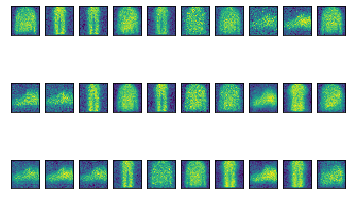

In [0]:
ix = 1
for u in range(10):
  for v in range(3):
    ax = plt.subplot(3,10,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(autoencoder.predict(x_val_vector_scaled)[ix].reshape(28,28))
    ix += 1
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 82us/step - loss: 0.2143 - val_loss: 0.2009
Epoch 2/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.1941 - val_loss: 0.1864
Epoch 3/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.1757 - val_loss: 0.1630
Epoch 4/50
60000/60000 [==============================] - 4s 72us/step - loss: 0.1475 - val_loss: 0.1310
Epoch 5/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.1158 - val_loss: 0.1015
Epoch 6/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.0915 - val_loss: 0.0829
Epoch 7/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.0781 - val_loss: 0.0738
Epoch 8/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.0718 - val_loss: 0.0697
Epoch 9/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.0690 - val_loss: 0.0679
Epoch

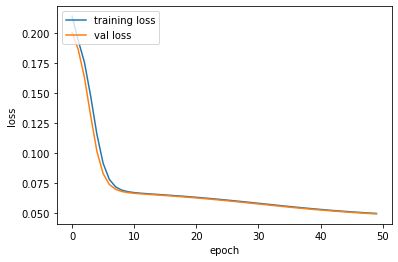

In [0]:
autoencoder = Sequential()

autoencoder.add(Dense(int(28*28*0.1),activation='relu')) # encoder
 
autoencoder.add(Dense(28*28)) #decoder

autoencoder.compile(optimizer=SGD(lr=0.002),loss='mse')
history4=autoencoder.fit(x_train_vector_scaled,x_train_vector_scaled,epochs=50,validation_data=(x_val_vector_scaled,x_val_vector_scaled))
if (len(history4.history["loss"])==50):
        plt.plot(history4.history["loss"],label="training loss")
        plt.plot(history4.history["val_loss"],label="val loss")
        plt.legend(loc="upper left")
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.plot

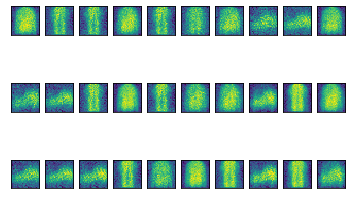

In [0]:
ix=1
for u in range(10):
  for v in range(3):
    ax = plt.subplot(3,10,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(autoencoder.predict(x_val_vector_scaled)[ix].reshape(28,28))
    ix += 1
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.2054 - val_loss: 0.2043
Epoch 2/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.2031 - val_loss: 0.2021
Epoch 3/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.2009 - val_loss: 0.1999
Epoch 4/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.1988 - val_loss: 0.1977
Epoch 5/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.1966 - val_loss: 0.1956
Epoch 6/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.1946 - val_loss: 0.1936
Epoch 7/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.1925 - val_loss: 0.1915
Epoch 8/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.1905 - val_loss: 0.1896
Epoch 9/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.1886 - val_loss: 0.1876
Epoch

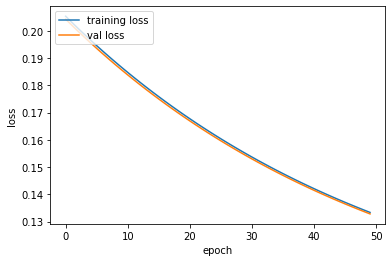

In [0]:
autoencoder = Sequential()

autoencoder.add(Dense(2,activation='relu')) # encoder
 
autoencoder.add(Dense(28*28)) #decoder

autoencoder.compile(optimizer=SGD(lr=0.002),loss='mse')
history5=autoencoder.fit(x_train_vector_scaled,x_train_vector_scaled,epochs=50,validation_data=(x_val_vector_scaled,x_val_vector_scaled))
if (len(history5.history["loss"])==50):
        plt.plot(history5.history["loss"],label="training loss")
        plt.plot(history5.history["val_loss"],label="val loss")
        plt.legend(loc="upper left")
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.plot

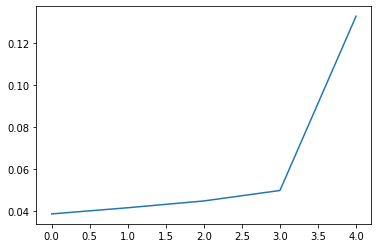

In [0]:
error=[0,0,0,0,0]
error[0]=min(history.history["val_loss"])
error[1]=min(history2.history["val_loss"])
error[2]=min(history3.history["val_loss"])
error[3]=min(history4.history["val_loss"])
error[4]=min(history5.history["val_loss"])
plt.plot([0,1,2,3,4],error)

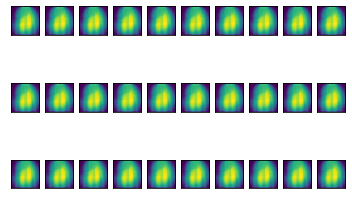

In [0]:
ix = 1
for u in range(10):
  for v in range(3):
    ax = plt.subplot(3,10,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(autoencoder.predict(x_val_vector_scaled)[ix].reshape(28,28))
    ix += 1
plt.show()

Los resultados muestran que mientras menos se compriman las imagenes, mejores serán los resultados. Esto es facil de ver pues, al comprimir demasiado la imagen se estará usando menos información para representar los datos. Si esto se lleva muy lejos la red asumirá que, por ejemplo, todos los zapatos son iguales. Al llevarlo al extremo la red mezclará clases, como se ve en la imagen.
Como buscamos un compromiso entre compresión y calidad, nos quedaremos con la opción de 0.7.

### 2.f Deep autoencoder

Pruebe ahora con una arquitectura ligeramente más profunda. Para esto utilice a lo menos 3 capas de encoding, es decir, 3 capas que progresivamente reduzcan la dimensionalidad de la representación hasta una dimensión objetivo inicialmente igual a la mejor obtenida en la pregunta anterior. Utilice igualmente a lo menos 2 capas de decoding, que se encarguen de aumentar la dimensionaliad de la representación hasta alcanzar la dimensión de la imagen original. Note que las primeras capas no necesariamente deben tener menor dimensionalidad que la imagen, la dimensión relevante es aquella de la última capa de encoding. 

¿Cómo aumenta el número de parámetros entrenables? ¿Aumenta el tamaño de la representación "comprimida"?

Una vez esté satisfecho con su arquitectura profunda, varíe la dimensión objetivo de la última capa de encoding, realizando una exploración similar a la pregunta anterior. 

¿Puede obtener una representación de menor dimensionalidad que la encontrada en el item anterior sin perder calidad en las imagenes obtenidas?

Utilice gráficos y muestre algunas imágenes reconstruidas para complementar sus comentarios. 


In [0]:
autoencoder = Sequential()

autoencoder.add(Dense(int(28*28*0.9),activation='relu')) 

autoencoder.add(Dense(int(28*28*0.8),activation='relu')) 

autoencoder.add(Dense(int(28*28*0.7),activation='relu')) 

autoencoder.add(Dense(int(28*28*0.8),activation='relu')) 

autoencoder.add(Dense(int(28*28*0.9),activation='relu')) 
 
autoencoder.add(Dense(28*28)) 

autoencoder.compile(optimizer=SGD(lr=0.002),loss='mse')
autoencoder.fit(x_train_vector_scaled,x_train_vector_scaled,epochs=0,validation_data=(x_val_vector_scaled,x_val_vector_scaled))
autoencoder.summary()

Train on 60000 samples, validate on 10000 samples
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 705)               553425    
_________________________________________________________________
dense_48 (Dense)             (None, 627)               442662    
_________________________________________________________________
dense_49 (Dense)             (None, 548)               344144    
_________________________________________________________________
dense_50 (Dense)             (None, 627)               344223    
_________________________________________________________________
dense_51 (Dense)             (None, 705)               442740    
_________________________________________________________________
dense_52 (Dense)             (None, 784)               553504    
Total params: 2,680,698
Trainable params: 2,680,698
Non-trainable par

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 102us/step - loss: 0.1942 - val_loss: 0.1746
Epoch 2/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.1448 - val_loss: 0.1123
Epoch 3/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.0904 - val_loss: 0.0751
Epoch 4/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.0698 - val_loss: 0.0661
Epoch 5/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.0652 - val_loss: 0.0640
Epoch 6/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.0638 - val_loss: 0.0631
Epoch 7/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.0629 - val_loss: 0.0623
Epoch 8/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.0621 - val_loss: 0.0615
Epoch 9/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.0613 - val_loss: 0.0606
Epoc

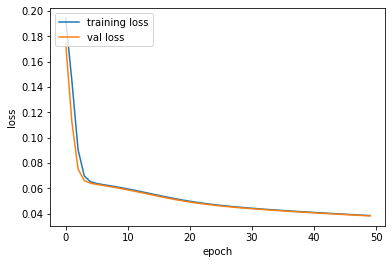

In [0]:
history=autoencoder.fit(x_train_vector_scaled,x_train_vector_scaled,epochs=50,validation_data=(x_val_vector_scaled,x_val_vector_scaled))
if (len(history.history["loss"])==50):
        plt.plot(history.history["loss"],label="training loss")
        plt.plot(history.history["val_loss"],label="val loss")
        plt.legend(loc="upper left")
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.plot


Las neuronas agregadas aumentan mucho el numero de parámetros, sin embargo la representación de la imagen tras el encoder es la misma ($28*28*0.7$).
Los errores bajan en 0.002 en comparación con su contraparte shallow.

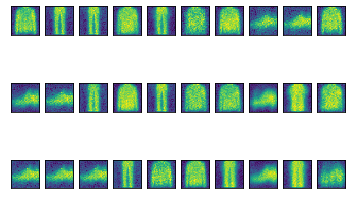

In [0]:
ix = 1
for u in range(10):
  for v in range(3):
    ax = plt.subplot(3,10,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(autoencoder.predict(x_val_vector_scaled)[ix].reshape(28,28))
    ix += 1
plt.show()

In [0]:
autoencoder = Sequential()

autoencoder.add(Dense(int(28*28*0.9),activation='relu')) 

autoencoder.add(Dense(int(28*28*0.7),activation='relu')) 

autoencoder.add(Dense(int(28*28*0.5),activation='relu')) 

autoencoder.add(Dense(int(28*28*0.7),activation='relu')) 

autoencoder.add(Dense(int(28*28*0.9),activation='relu')) 
 
autoencoder.add(Dense(28*28)) 

autoencoder.compile(optimizer=SGD(lr=0.002),loss='mse')
autoencoder.fit(x_train_vector_scaled,x_train_vector_scaled,epochs=0,validation_data=(x_val_vector_scaled,x_val_vector_scaled))
autoencoder.summary()


Train on 60000 samples, validate on 10000 samples
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 705)               553425    
_________________________________________________________________
dense_54 (Dense)             (None, 548)               386888    
_________________________________________________________________
dense_55 (Dense)             (None, 392)               215208    
_________________________________________________________________
dense_56 (Dense)             (None, 548)               215364    
_________________________________________________________________
dense_57 (Dense)             (None, 705)               387045    
_________________________________________________________________
dense_58 (Dense)             (None, 784)               553504    
Total params: 2,311,434
Trainable params: 2,311,434
Non-trainable par

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 110us/step - loss: 0.1932 - val_loss: 0.1756
Epoch 2/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.1480 - val_loss: 0.1180
Epoch 3/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.0956 - val_loss: 0.0789
Epoch 4/50
60000/60000 [==============================] - 5s 91us/step - loss: 0.0721 - val_loss: 0.0673
Epoch 5/50
60000/60000 [==============================] - 6s 92us/step - loss: 0.0659 - val_loss: 0.0645
Epoch 6/50
60000/60000 [==============================] - 6s 92us/step - loss: 0.0642 - val_loss: 0.0634
Epoch 7/50
60000/60000 [==============================] - 6s 92us/step - loss: 0.0633 - val_loss: 0.0627
Epoch 8/50
60000/60000 [==============================] - 6s 92us/step - loss: 0.0626 - val_loss: 0.0619
Epoch 9/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.0618 - val_loss: 0.0611
Epoc

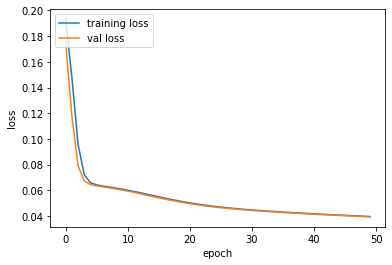

In [0]:
history=autoencoder.fit(x_train_vector_scaled,x_train_vector_scaled,epochs=50,validation_data=(x_val_vector_scaled,x_val_vector_scaled))
if (len(history.history["loss"])==50):
        plt.plot(history.history["loss"],label="training loss")
        plt.plot(history.history["val_loss"],label="val loss")
        plt.legend(loc="upper left")
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.plot

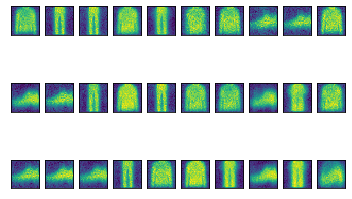

In [0]:
ix = 1
for u in range(10):
  for v in range(3):
    ax = plt.subplot(3,10,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(autoencoder.predict(x_val_vector_scaled)[ix].reshape(28,28))
    ix += 1
plt.show()

In [0]:
autoencoder = Sequential()

autoencoder.add(Dense(int(28*28*0.7),activation='relu')) 

autoencoder.add(Dense(int(28*28*0.5),activation='relu')) 

autoencoder.add(Dense(int(28*28*0.3),activation='relu')) 

autoencoder.add(Dense(int(28*28*0.5),activation='relu')) 

autoencoder.add(Dense(int(28*28*0.7),activation='relu')) 
 
autoencoder.add(Dense(28*28)) 

autoencoder.compile(optimizer=SGD(lr=0.002),loss='mse')
autoencoder.fit(x_train_vector_scaled,x_train_vector_scaled,epochs=0,validation_data=(x_val_vector_scaled,x_val_vector_scaled))
autoencoder.summary()

Train on 60000 samples, validate on 10000 samples
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 548)               430180    
_________________________________________________________________
dense_42 (Dense)             (None, 392)               215208    
_________________________________________________________________
dense_43 (Dense)             (None, 235)               92355     
_________________________________________________________________
dense_44 (Dense)             (None, 392)               92512     
_________________________________________________________________
dense_45 (Dense)             (None, 548)               215364    
_________________________________________________________________
dense_46 (Dense)             (None, 784)               430416    
Total params: 1,476,035
Trainable params: 1,476,035
Non-trainable par

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.2023 - val_loss: 0.1935
Epoch 2/50
60000/60000 [==============================] - 5s 85us/step - loss: 0.1800 - val_loss: 0.1616
Epoch 3/50
60000/60000 [==============================] - 5s 85us/step - loss: 0.1346 - val_loss: 0.1074
Epoch 4/50
60000/60000 [==============================] - 5s 85us/step - loss: 0.0892 - val_loss: 0.0760
Epoch 5/50
60000/60000 [==============================] - 5s 85us/step - loss: 0.0709 - val_loss: 0.0672
Epoch 6/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.0662 - val_loss: 0.0651
Epoch 7/50
60000/60000 [==============================] - 5s 86us/step - loss: 0.0649 - val_loss: 0.0643
Epoch 8/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.0644 - val_loss: 0.0639
Epoch 9/50
60000/60000 [==============================] - 6s 95us/step - loss: 0.0639 - val_loss: 0.0634
Epoch

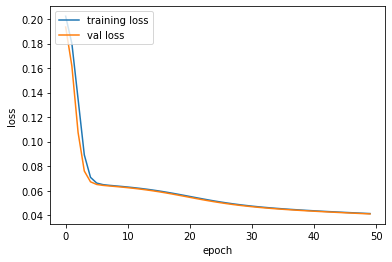

In [0]:
history=autoencoder.fit(x_train_vector_scaled,x_train_vector_scaled,epochs=50,validation_data=(x_val_vector_scaled,x_val_vector_scaled))
if (len(history.history["loss"])==50):
        plt.plot(history.history["loss"],label="training loss")
        plt.plot(history.history["val_loss"],label="val loss")
        plt.legend(loc="upper left")
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.plot

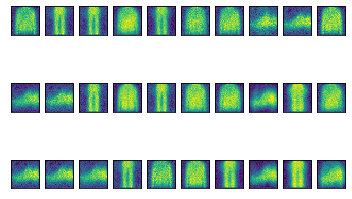

In [0]:
ix = 1
for u in range(10):
  for v in range(3):
    ax = plt.subplot(3,10,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(autoencoder.predict(x_val_vector_scaled)[ix].reshape(28,28))
    ix += 1
plt.show()

In [0]:
autoencoder = Sequential()

autoencoder.add(Dense(int(28*28*0.5),activation='relu')) 

autoencoder.add(Dense(int(28*28*0.3),activation='relu')) 

autoencoder.add(Dense(int(28*28*0.1),activation='relu')) 

autoencoder.add(Dense(int(28*28*0.3),activation='relu')) 

autoencoder.add(Dense(int(28*28*0.5),activation='relu')) 
 
autoencoder.add(Dense(28*28)) 

autoencoder.compile(optimizer=SGD(lr=0.002),loss='mse')
autoencoder.fit(x_train_vector_scaled,x_train_vector_scaled,epochs=0,validation_data=(x_val_vector_scaled,x_val_vector_scaled))
autoencoder.summary()

Train on 60000 samples, validate on 10000 samples
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 392)               307720    
_________________________________________________________________
dense_60 (Dense)             (None, 235)               92355     
_________________________________________________________________
dense_61 (Dense)             (None, 78)                18408     
_________________________________________________________________
dense_62 (Dense)             (None, 235)               18565     
_________________________________________________________________
dense_63 (Dense)             (None, 392)               92512     
_________________________________________________________________
dense_64 (Dense)             (None, 784)               308112    
Total params: 837,672
Trainable params: 837,672
Non-trainable params:

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 101us/step - loss: 0.2029 - val_loss: 0.1970
Epoch 2/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.1881 - val_loss: 0.1760
Epoch 3/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.1554 - val_loss: 0.1316
Epoch 4/50
60000/60000 [==============================] - 5s 86us/step - loss: 0.1094 - val_loss: 0.0904
Epoch 5/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.0800 - val_loss: 0.0724
Epoch 6/50
60000/60000 [==============================] - 6s 92us/step - loss: 0.0695 - val_loss: 0.0671
Epoch 7/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.0665 - val_loss: 0.0656
Epoch 8/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.0656 - val_loss: 0.0651
Epoch 9/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.0653 - val_loss: 0.0648
Epoc

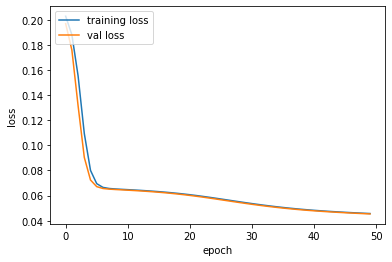

In [0]:
history=autoencoder.fit(x_train_vector_scaled,x_train_vector_scaled,epochs=50,validation_data=(x_val_vector_scaled,x_val_vector_scaled))
if (len(history.history["loss"])==50):
        plt.plot(history.history["loss"],label="training loss")
        plt.plot(history.history["val_loss"],label="val loss")
        plt.legend(loc="upper left")
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.plot

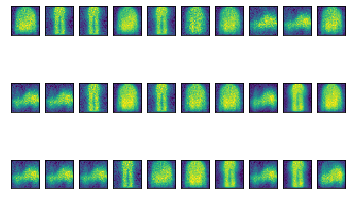

In [0]:
ix = 1
for u in range(10):
  for v in range(3):
    ax = plt.subplot(3,10,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(autoencoder.predict(x_val_vector_scaled)[ix].reshape(28,28))
    ix += 1
plt.show()

In [0]:
autoencoder = Sequential()

autoencoder.add(Dense(int(28*28*0.3),activation='relu')) 

autoencoder.add(Dense(int(28*28*0.1),activation='relu')) 

autoencoder.add(Dense(3,activation='relu')) 

autoencoder.add(Dense(int(28*28*0.1),activation='relu')) 

autoencoder.add(Dense(int(28*28*0.3),activation='relu')) 
 
autoencoder.add(Dense(28*28)) 

autoencoder.compile(optimizer=SGD(lr=0.002),loss='mse')
autoencoder.fit(x_train_vector_scaled,x_train_vector_scaled,epochs=0,validation_data=(x_val_vector_scaled,x_val_vector_scaled))
autoencoder.summary()

Train on 60000 samples, validate on 10000 samples
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 235)               184475    
_________________________________________________________________
dense_66 (Dense)             (None, 78)                18408     
_________________________________________________________________
dense_67 (Dense)             (None, 3)                 237       
_________________________________________________________________
dense_68 (Dense)             (None, 78)                312       
_________________________________________________________________
dense_69 (Dense)             (None, 235)               18565     
_________________________________________________________________
dense_70 (Dense)             (None, 784)               185024    
Total params: 407,021
Trainable params: 407,021
Non-trainable params:

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 99us/step - loss: 0.2045 - val_loss: 0.2027
Epoch 2/50
60000/60000 [==============================] - 5s 85us/step - loss: 0.2004 - val_loss: 0.1978
Epoch 3/50
60000/60000 [==============================] - 5s 86us/step - loss: 0.1939 - val_loss: 0.1890
Epoch 4/50
60000/60000 [==============================] - 5s 85us/step - loss: 0.1810 - val_loss: 0.1706
Epoch 5/50
60000/60000 [==============================] - 5s 85us/step - loss: 0.1553 - val_loss: 0.1377
Epoch 6/50
60000/60000 [==============================] - 5s 84us/step - loss: 0.1195 - val_loss: 0.1024
Epoch 7/50
60000/60000 [==============================] - 5s 86us/step - loss: 0.0904 - val_loss: 0.0805
Epoch 8/50
60000/60000 [==============================] - 5s 85us/step - loss: 0.0752 - val_loss: 0.0710
Epoch 9/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.0692 - val_loss: 0.0675
Epoch

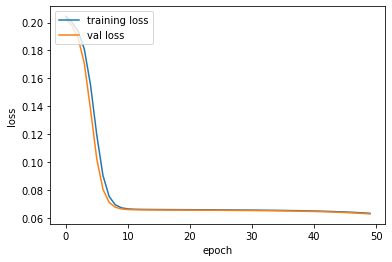

In [0]:
history=autoencoder.fit(x_train_vector_scaled,x_train_vector_scaled,epochs=50,validation_data=(x_val_vector_scaled,x_val_vector_scaled))
if (len(history.history["loss"])==50):
        plt.plot(history.history["loss"],label="training loss")
        plt.plot(history.history["val_loss"],label="val loss")
        plt.legend(loc="upper left")
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.plot

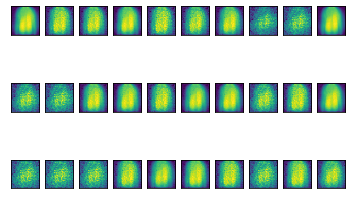

In [0]:
ix = 1
for u in range(10):
  for v in range(3):
    ax = plt.subplot(3,10,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(autoencoder.predict(x_val_vector_scaled)[ix].reshape(28,28))
    ix += 1
plt.show()

Efectivamente usar una red más profunda aumenta el desempeño de la red. Perdidas de 0.040 se alcanzaron en una red shallow con $28*28*0.7$ neuronas escondidas (70%), esa misma perdida se obtuvo en una red profunda con solo 50% de neuronas escondidas en la capa final del encoder. Incluso comprimiendo toda la información en 2 neuronas se puede ver como la red profunda muestra mejor perfomance y las imágenes reconstruidas ya no son todas iguales.

### 2.g Convolutional Autoencoder

Como hemos hasta ahora  utilizado una arquitectura fully connected, nuestra red no toma en cuenta la infomación local contenida en la proximidad de un pixel en la imagen. Como vimos en la tarea anterior, esta información podría ser crucial al momento de procesar imágenes. 

En este item deberá implementar un autoencoder convolucional. La sección de encoding de la red se creará de igual manera que las redes convolucionales creadas en la tarea 1. Puede utilizar capas de Max Pooling o Strides mayores a 1 para reducir la dimensionalidad en esta etapa. Tenga en mente como varía la dimensión de la imagen a lo largo del proceso. 

Para luego recuperar la dimensionalidad de la imagen original debemos utilizar una capa llamada usualmente como "Deconvolution Layer". Esta capa realiza el proceso inverso que aquel realizado por una capa convolucional, por lo cual utilizando por ejemplo `stride=2` puede duplicar la dimensionalidad de su input. 

Puede realizar la profundidad que desee, pero tome en cuenta que una mayor profundidad de la sección convolucional permite a la red reducir dimensionalidad más lentamente, sin "forzar" la compresión de las características. Note que para reconstruir la dimensión original puede usar `output_padding` para corregir problemas de paridad, entre otros. 

Puede igualmente optar por usar algun número de capas densas en el cuello de botella del autoencoder, usando al comienzo de esta una capa `Flatten` y al final de ella una capa `Reshape` (`keras.layers.Reshape(target_shape)`) para recuperar la bidimensionalidad.

¡No olvide que para entrenar esta red debe usar la versión bidimensional de los datos escalados!

Visualice que tan bien se comporta la convolución, en terminos de la función de pérdida y visualizando las imagenes reconstruidas. Compárese con la red densa. 

In [0]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Flatten
from keras.layers import Dense
from keras.optimizers import SGD
from keras.models import Sequential

x_train_scaled=x_train_vector_scaled.reshape(-1,28,28,1)
x_val_scaled=x_val_vector_scaled.reshape(-1,28,28,1)



In [0]:
conv=Sequential()
#E
conv.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu',input_shape=x_train_scaled.shape[1:]))

conv.add(MaxPooling2D(pool_size=(2, 2)))

conv.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'))

conv.add(MaxPooling2D(pool_size=(2, 2)))

conv.add(Conv2D(filters=1, kernel_size=(3, 3), padding='same', activation='relu'))

#D
conv.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'))

conv.add(UpSampling2D((2, 2)))

conv.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))

conv.add(UpSampling2D((2, 2)))

conv.add(Conv2D(filters=1, kernel_size=(3, 3), padding='same', activation='relu'))


conv.compile(optimizer=SGD(lr=0.002),loss='mse')
conv.fit(x_train_scaled,x_train_scaled,epochs=0,validation_data=(x_val_scaled,x_val_scaled))
conv.summary()









Train on 60000 samples, validate on 10000 samples
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 1)           145       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 16)          160       
______________________________________________________________

La imagen pasa de 28x28 a 7x7

Train on 60000 samples, validate on 10000 samples
Epoch 1/50





60000/60000 [==============================] - 26s 438us/step - loss: 0.0588 - val_loss: 0.0415
Epoch 2/50
60000/60000 [==============================] - 13s 221us/step - loss: 0.0392 - val_loss: 0.0372
Epoch 3/50
60000/60000 [==============================] - 13s 219us/step - loss: 0.0359 - val_loss: 0.0345
Epoch 4/50
60000/60000 [==============================] - 13s 220us/step - loss: 0.0336 - val_loss: 0.0326
Epoch 5/50
60000/60000 [==============================] - 13s 219us/step - loss: 0.0319 - val_loss: 0.0310
Epoch 6/50
60000/60000 [==============================] - 13s 219us/step - loss: 0.0304 - val_loss: 0.0297
Epoch 7/50
60000/60000 [==============================] - 13s 218us/step - loss: 0.0292 - val_loss: 0.0285
Epoch 8/50
60000/60000 [==============================] - 13s 222us/step - loss: 0.0281 - val_loss: 0.0275
Epoch 9/50
60000/60000 [==============================] - 14s 234us/step - loss: 0.0271 -

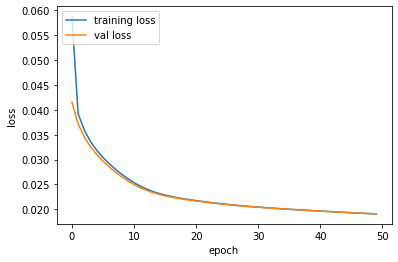

In [0]:
history=conv.fit(x_train_scaled,x_train_scaled,epochs=50,validation_data=(x_val_scaled,x_val_scaled))
if (len(history.history["loss"])==50):
        plt.plot(history.history["loss"],label="training loss")
        plt.plot(history.history["val_loss"],label="val loss")
        plt.legend(loc="upper left")
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.plot

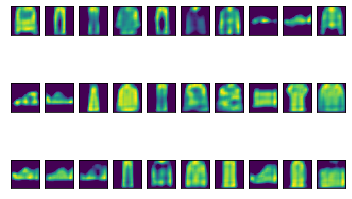

In [0]:
ix = 1
for u in range(10):
  for v in range(3):
    ax = plt.subplot(3,10,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(conv.predict(x_val_scaled)[ix].reshape(28,28))
    ix += 1
plt.show()

Usando redes convolucionales se obtienen muchos mejores resultados. Los autoencoders vistos anteriormente reconstruian todos los zapatos como uno solo. Usando redes convolucionales podemos ver incluso como unos miran hacia un lado u otro. Esta comprime los datos hasta dejar solo un 6.25% de la información original, y aun así se comporta mejor que un autoencoder no convolucional de 70% de compresion. Se obtuvo una perdida de 0.0191.

### 2.h Transfer Learning y reducción de dimensionalidad

Como mencionamos inicialmente, una de las utilidades de los autoencoders corresponde a la no necesidad de tener etiquetas. En ese caso, podemos utilizar los autoencoders para extraer representaciones significativas de los ejemplos no etiquetados, y luego utilizar ese conocimiento para mejorar el desempeño de nuestros algoritmos. 

Para simular esta tarea supongamos que tenemos la misma base de datos original, sin embargo solo poseemos un pequeño porcentaje de las etiquetas del conjunto de entrenamiento, menos del $5\%$ (considere que si tuviera que etiquetar manualmente incluso solo un $5\%$ correspondería a 3000 imagenes por etiquetar!).

Seleccione un subconjunto de datos correspondiente a menos del $5\%$ de los datos y entrene un modelo predictivo para el problema de clasificación. Si bien la aproximación convolucional suele ser la mejor para este tipo de bases de datos, utilice arquitectura densa. 

Luego, utilizando el mejor autoencoder entrenado hasta ahora (o entrene uno nuevo si prefiere), utilize lo aprendido por la red sobre el conjunto de datos sin etiquetas para intentar aprender la relación suyaciente. Para esto, lo más fácil es primero preprocesar el conjunto `x` de entrenamiento, utilizando la sección de encoding de su autoencoder. Puede crear un nuevo modelo secuencial solo con las capas de encoding como se muestra en el código y luego usar el método `.predict` del modelo. Luego sobre estos datos preprocesados entrene un nuevo modelo predictivo fully connected. 

La otra opción sería crear un modelo cuya primeras capas correspondan a la sección de encoding del autoencoder y las últimas capas a su modelo denso, pero fijando el atributo `trainable` de las primeras capas como `False`, sin embargo esto resulta poco eficiente. 


Comente sus resultados basándose en métricas adecuadas. Comente igualmente sobre la dimensionalidad de las representaciones utilizadas por cada uno de los dos modelos entrenados en esta sección y el número de parametros _entrenables_ y totales del modelo (considerando el encoding). 

Considerando la dimensionalidad obtenida por el encoder, compare la calidad de la representación obtenida por el autoencoder frente a otras aproximaciones de reducción de dimensionalidad, como por ejemplo Principal Component Analysis (PCA). Para esto, transforme los datos de entrenamiento utilizando PCA con un número de componentes principales igual a la dimensión de la representación engendrada por su encoder. Compare el desempeño de un modelo determinado utilizando ambas representaciones. 

Comente sus resultados.

In [0]:
from keras.utils import to_categorical

y_train_cat=to_categorical(y_train)
y_val_cat=to_categorical(y_val)

In [0]:
clasificador = Sequential()

clasificador.add(Dense(128,activation='relu')) 
 
clasificador.add(Dense(10,activation='softmax'))

clasificador.compile(optimizer=SGD(lr=0.002),loss='categorical_crossentropy', metrics=['acc'])
history=clasificador.fit(x_train_vector_scaled[0:3000],y_train_cat[0:3000],epochs=50,validation_data=(x_val_vector_scaled[0:500],y_val_cat[0:500]))

Train on 3000 samples, validate on 500 samples
Epoch 1/50
3000/3000 [==============================] - 1s 191us/step - loss: 2.2005 - acc: 0.2693 - val_loss: 1.9865 - val_acc: 0.3700
Epoch 2/50
3000/3000 [==============================] - 0s 103us/step - loss: 1.8568 - acc: 0.4450 - val_loss: 1.7290 - val_acc: 0.5160
Epoch 3/50
3000/3000 [==============================] - 0s 102us/step - loss: 1.6424 - acc: 0.5500 - val_loss: 1.5459 - val_acc: 0.5760
Epoch 4/50
3000/3000 [==============================] - 0s 101us/step - loss: 1.4836 - acc: 0.6147 - val_loss: 1.4062 - val_acc: 0.6260
Epoch 5/50
3000/3000 [==============================] - 0s 102us/step - loss: 1.3610 - acc: 0.6453 - val_loss: 1.2949 - val_acc: 0.6480
Epoch 6/50
3000/3000 [==============================] - 0s 102us/step - loss: 1.2644 - acc: 0.6613 - val_loss: 1.2077 - val_acc: 0.6780
Epoch 7/50
3000/3000 [==============================] - 0s 101us/step - loss: 1.1865 - acc: 0.6753 - val_loss: 1.1374 - val_acc: 0.6920
E

In [0]:
from sklearn.metrics import mean_squared_error
y_predict=clasificador.predict(x_val_vector_scaled)
mean_squared_error(y_predict,y_val_cat)

0.03267283

In [0]:

transfer = Sequential()

transfer.add(conv.get_layer(index=0))
transfer.add(conv.get_layer(index=1))
transfer.add(conv.get_layer(index=2))
transfer.add(conv.get_layer(index=3))
transfer.add(conv.get_layer(index=4))
transfer.add(Flatten())

new_x_train=transfer.predict(x_train_scaled)[0:3000]
new_x_val=transfer.predict(x_val_scaled)[0:500]

clasificador2 = Sequential()

clasificador2.add(Dense(128,activation='relu')) 
 
clasificador2.add(Dense(10,activation='softmax'))

clasificador2.compile(optimizer=SGD(lr=0.002),loss='categorical_crossentropy', metrics=['acc'])
history=clasificador2.fit(new_x_train,y_train_cat[0:3000],epochs=50,validation_data=(new_x_val,y_val_cat[0:500]))

Train on 3000 samples, validate on 500 samples
Epoch 1/50
3000/3000 [==============================] - 1s 199us/step - loss: 2.3315 - acc: 0.1650 - val_loss: 2.2463 - val_acc: 0.2360
Epoch 2/50
3000/3000 [==============================] - 0s 105us/step - loss: 2.2280 - acc: 0.2393 - val_loss: 2.1650 - val_acc: 0.3040
Epoch 3/50
3000/3000 [==============================] - 0s 100us/step - loss: 2.1507 - acc: 0.2860 - val_loss: 2.0997 - val_acc: 0.3420
Epoch 4/50
3000/3000 [==============================] - 0s 101us/step - loss: 2.0870 - acc: 0.3513 - val_loss: 2.0432 - val_acc: 0.4060
Epoch 5/50
3000/3000 [==============================] - 0s 100us/step - loss: 2.0307 - acc: 0.4073 - val_loss: 1.9917 - val_acc: 0.4600
Epoch 6/50
3000/3000 [==============================] - 0s 98us/step - loss: 1.9789 - acc: 0.4367 - val_loss: 1.9425 - val_acc: 0.4800
Epoch 7/50
3000/3000 [==============================] - 0s 99us/step - loss: 1.9299 - acc: 0.4603 - val_loss: 1.8956 - val_acc: 0.5040
Epo

In [0]:
y_predict=clasificador2.predict(transfer.predict(x_val_scaled))
mean_squared_error(y_predict,y_val_cat)

0.05204023

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=49)
pca.fit(x_train_vector_scaled)
new_x_train=pca.transform(x_train_vector_scaled)[0:3000]
new_x_val=pca.transform(x_val_vector_scaled)[0:500]

clasificador3 = Sequential()

clasificador3.add(Dense(128,activation='relu')) 
 
clasificador3.add(Dense(10,activation='softmax'))

clasificador3.compile(optimizer=SGD(lr=0.002),loss='categorical_crossentropy', metrics=['acc'])
history=clasificador3.fit(new_x_train,y_train_cat[0:3000],epochs=50,validation_data=(new_x_val,y_val_cat[0:500]))


Train on 3000 samples, validate on 500 samples
Epoch 1/50
3000/3000 [==============================] - 1s 212us/step - loss: 2.2658 - acc: 0.1340 - val_loss: 2.0344 - val_acc: 0.2980
Epoch 2/50
3000/3000 [==============================] - 0s 101us/step - loss: 1.8742 - acc: 0.3970 - val_loss: 1.7291 - val_acc: 0.4860
Epoch 3/50
3000/3000 [==============================] - 0s 100us/step - loss: 1.6144 - acc: 0.5120 - val_loss: 1.5210 - val_acc: 0.5640
Epoch 4/50
3000/3000 [==============================] - 0s 97us/step - loss: 1.4353 - acc: 0.5837 - val_loss: 1.3721 - val_acc: 0.5980
Epoch 5/50
3000/3000 [==============================] - 0s 98us/step - loss: 1.3066 - acc: 0.6273 - val_loss: 1.2622 - val_acc: 0.6300
Epoch 6/50
3000/3000 [==============================] - 0s 99us/step - loss: 1.2107 - acc: 0.6463 - val_loss: 1.1785 - val_acc: 0.6520
Epoch 7/50
3000/3000 [==============================] - 0s 99us/step - loss: 1.1368 - acc: 0.6643 - val_loss: 1.1121 - val_acc: 0.6660
Epoch

In [0]:
y_predict=clasificador3.predict(pca.transform(x_val_vector_scaled))
mean_squared_error(y_predict,y_val_cat)

0.032224234

Lamentablemente no obtuvimos buenos resultados usando transfer learning. De las tres opciones, el uso de autoencoders obtuvo los peores resultados (error=0.0520), mientras que PCA con 49 componentes (49 para que comprima la información en imagenes de 7x7 igual que el autoencoder) obtuvo resultados ligeramente mejores que usando el clasificador sin compresión.

### 2.i Denoising Autoencoder 

Otra utilidad que se le ha dado a los autoencoders es la posibilidad de utilizarlos para separar ruido de información. Para entrenar tal tipo de modelo, la idea es simple: utilizar como datos de entrada imagenes a las cuales se les ha agregado artificialmente ruido y como objetivo la imagen original sin ruido. 

Entrene alguna arquitectura de autoencoder que le parezca apropiada para la tarea utilizando algún tipo de ruido aleatorio. Puede utilizar cambios en valores de pixeles aleatoriamente, o por ejemplo "promediar" ponderadamente la imagen original con alguna otra imagen del dataset ligeramente modificada. Puede utilizar las librerías `random` de `numpy` o utilizar por ejemplo el `ImageDataGenerator` que utilizamos en la tarea anterior para generar imágenes similares con las cuales "sumar" ruido. Sea creativo, puede crear el ruido que desee. Idealmente, considerando la naturaleza del problema que se buscaría modelar (eliminar ruido real de mediciones), la naturaleza del ruido agregado debe ser estocástica y no puede "repetirse" el mismo patron de ruido a lo largo de todo el entrenamiendo, es decir, si agregó un ruido estocástico a cada imagen del conjunto, este proceso debe iterarse igualmente luego de cada época de entrenamiento, para evitar que la red aprenda un patrón especifico de ruido, si no aprenda realmente a diferenciar ruido sin información de la información suyaciente a la imagen. 

Una vez esté satisfecho con la red, muestre ejemplos de la imagen con ruido, la imagen original y la imagen reconstruida. Pruebe igualmente entregarle a la red nuevas.

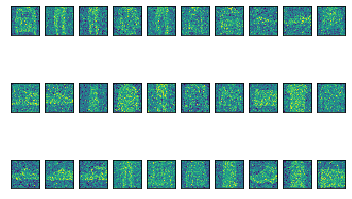

In [0]:
import numpy as np
noise = np.random.normal(loc=0.5, scale=0.5, size=x_train_scaled.shape)
x_train_noisy = x_train_scaled + noise
noise = np.random.normal(loc=0.5, scale=0.5, size=x_val_scaled.shape)
x_val_noisy = x_val_scaled + noise


ix = 1
for u in range(10):
  for v in range(3):
    ax = plt.subplot(3,10,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(x_val_noisy[ix].reshape(28,28))
    ix += 1
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 15s 248us/step - loss: 0.1176 - val_loss: 0.1069
Epoch 2/50
60000/60000 [==============================] - 15s 243us/step - loss: 0.0666 - val_loss: 0.0457
Epoch 3/50
60000/60000 [==============================] - 14s 240us/step - loss: 0.0424 - val_loss: 0.0398
Epoch 4/50
60000/60000 [==============================] - 14s 240us/step - loss: 0.0386 - val_loss: 0.0374
Epoch 5/50
60000/60000 [==============================] - 14s 240us/step - loss: 0.0368 - val_loss: 0.0361
Epoch 6/50
60000/60000 [==============================] - 14s 240us/step - loss: 0.0357 - val_loss: 0.0351
Epoch 7/50
60000/60000 [==============================] - 14s 238us/step - loss: 0.0348 - val_loss: 0.0343
Epoch 8/50
60000/60000 [==============================] - 14s 240us/step - loss: 0.0341 - val_loss: 0.0337
Epoch 9/50
60000/60000 [==============================] - 14s 240us/step - loss: 0.0336 - val_

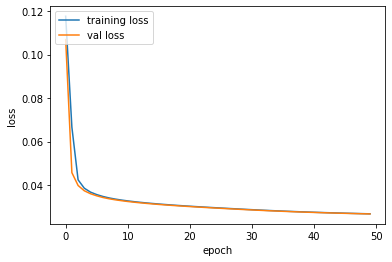

In [0]:
denoise=Sequential()
#E
denoise.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu',input_shape=x_train_scaled.shape[1:]))

denoise.add(MaxPooling2D(pool_size=(2, 2)))

denoise.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'))

denoise.add(MaxPooling2D(pool_size=(2, 2)))

denoise.add(Conv2D(filters=1, kernel_size=(3, 3), padding='same', activation='relu'))

#D
denoise.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'))

denoise.add(UpSampling2D((2, 2)))

denoise.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))

denoise.add(UpSampling2D((2, 2)))

denoise.add(Conv2D(filters=1, kernel_size=(3, 3), padding='same', activation='relu'))


denoise.compile(optimizer=SGD(lr=0.002),loss='mse')

history=denoise.fit(x_train_noisy,x_train_scaled,epochs=50,validation_data=(x_val_noisy,x_val_scaled))
if (len(history.history["loss"])==50):
        plt.plot(history.history["loss"],label="training loss")
        plt.plot(history.history["val_loss"],label="val loss")
        plt.legend(loc="upper left")
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.plot

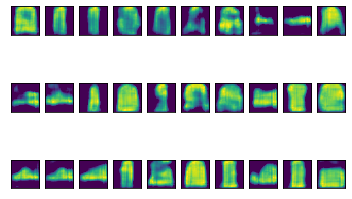

In [0]:
ix = 1
for u in range(10):
  for v in range(3):
    ax = plt.subplot(3,10,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(denoise.predict(x_val_noisy)[ix].reshape(28,28))
    ix += 1
plt.show()

Efectivamente elimina el ruido, aunque tambien "deforma" las imágenes, y por ejemplo los zapatos de la primera linea son irreconocibles.

### 2.j Generación de imágenes

Otra utilización posible que podría darse, quizás, a los autoencoders, es utilizar los decoders para generar nuevas imagenes. La idea de esto sería considerar que la habilidad que tiene la sección decoder de generar una imagen a partir de una representación de menor dimensionalidad puede aprovecharse. 

Para esto, extraiga la sección de encoding y la sección de decoding de alguno de los autoencoders entrenados que prefiera. Obtenga los valores de la representación interna de las imagenes usando el encoder para calcularlos. Luego agréguele a esta representación algún ruido de su preferencia, y calcule la imagen resultante utilizando el decoder. ¿Qué observa? Muestre las imagenes obtenidas junto con otras imagenes de la misma categoría que la imagen que utilizó originalmente. Preube con distintos valores de ruido.

Pruebe también, por ejemplo, calcular la imagen obtenida al promediar las representaciones comprimidas de varias (o todas) las imagenes de una clase. Utilice el encoder para generar imagenes a partir de otros valores que se les ocurran y especule sobre el por qué la imagen obtenida se asimila o no a las imagenes del dataset. 

In [0]:
enc = Sequential()
enc.add(conv.get_layer(index=0))
enc.add(conv.get_layer(index=1))
enc.add(conv.get_layer(index=2))
enc.add(conv.get_layer(index=3))
enc.add(conv.get_layer(index=4))

dec=Sequential()
dec.add(conv.get_layer(index=5))
dec.add(conv.get_layer(index=6))
dec.add(conv.get_layer(index=7))
dec.add(conv.get_layer(index=8))
dec.add(conv.get_layer(index=9))

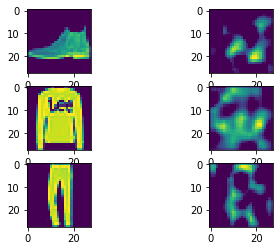

In [0]:
some_pic=enc.predict(x_val_scaled[100].reshape(1,28,28,1))
some_pic+=np.random.normal(loc=0.5, scale=0.5, size=(1,7,7,1))
ax = plt.subplot(3,2,1)
plt.imshow(x_val_scaled[0].reshape(28,28))
ax = plt.subplot(3,2,2)
plt.imshow(dec.predict(pics[0].reshape(1,7,7,1)).reshape(28,28))
ax = plt.subplot(3,2,3)
plt.imshow(x_val_scaled[1].reshape(28,28))
ax = plt.subplot(3,2,4)
plt.imshow(dec.predict(pics[1].reshape(1,7,7,1)).reshape(28,28))
ax = plt.subplot(3,2,5)
plt.imshow(x_val_scaled[2].reshape(28,28))
ax = plt.subplot(3,2,6)
plt.imshow(dec.predict(pics[2].reshape(1,7,7,1)).reshape(28,28))
plt.show()

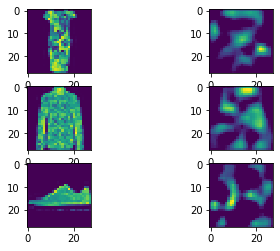

In [0]:
ax = plt.subplot(3,2,1)
plt.imshow(x_val_scaled[100].reshape(28,28))
ax = plt.subplot(3,2,2)
plt.imshow(dec.predict(pics[100].reshape(1,7,7,1)).reshape(28,28))
ax = plt.subplot(3,2,3)
plt.imshow(x_val_scaled[101].reshape(28,28))
ax = plt.subplot(3,2,4)
plt.imshow(dec.predict(pics[101].reshape(1,7,7,1)).reshape(28,28))
ax = plt.subplot(3,2,5)
plt.imshow(x_val_scaled[102].reshape(28,28))
ax = plt.subplot(3,2,6)
plt.imshow(dec.predict(pics[102].reshape(1,7,7,1)).reshape(28,28))
plt.show()

Las imágenes generadas no se parecen en nada a las imágenes reales. Quizas se hubiese obtenido mejores resultados usando un denoising autoencoder.

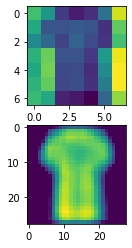

In [0]:
prom0=np.sum(enc.predict(x_val_scaled[np.where(y_val==0)[0]]),axis=0)/1000
ax = plt.subplot(2,1,1)
plt.imshow(prom0.reshape(7,7))
ax = plt.subplot(2,1,2)
plt.imshow(dec.predict(prom0.reshape(1,7,7,1)).reshape(28,28))
plt.show()

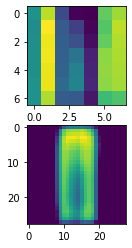

In [0]:
prom0=np.sum(enc.predict(x_val_scaled[np.where(y_val==1)[0]]),axis=0)/1000
ax = plt.subplot(2,1,1)
plt.imshow(prom0.reshape(7,7))
ax = plt.subplot(2,1,2)
plt.imshow(dec.predict(prom0.reshape(1,7,7,1)).reshape(28,28))
plt.show()

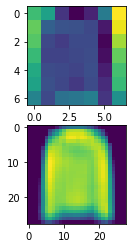

In [0]:
prom0=np.sum(enc.predict(x_val_scaled[np.where(y_val==2)[0]]),axis=0)/1000
ax = plt.subplot(2,1,1)
plt.imshow(prom0.reshape(7,7))
ax = plt.subplot(2,1,2)
plt.imshow(dec.predict(prom0.reshape(1,7,7,1)).reshape(28,28))
plt.show()

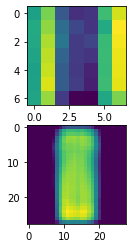

In [0]:
prom0=np.sum(enc.predict(x_val_scaled[np.where(y_val==3)[0]]),axis=0)/1000
ax = plt.subplot(2,1,1)
plt.imshow(prom0.reshape(7,7))
ax = plt.subplot(2,1,2)
plt.imshow(dec.predict(prom0.reshape(1,7,7,1)).reshape(28,28))
plt.show()

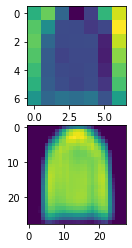

In [0]:
prom0=np.sum(enc.predict(x_val_scaled[np.where(y_val==4)[0]]),axis=0)/1000
ax = plt.subplot(2,1,1)
plt.imshow(prom0.reshape(7,7))
ax = plt.subplot(2,1,2)
plt.imshow(dec.predict(prom0.reshape(1,7,7,1)).reshape(28,28))
plt.show()

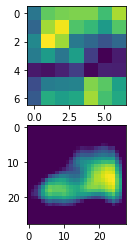

In [0]:
prom0=np.sum(enc.predict(x_val_scaled[np.where(y_val==5)[0]]),axis=0)/1000
ax = plt.subplot(2,1,1)
plt.imshow(prom0.reshape(7,7))
ax = plt.subplot(2,1,2)
plt.imshow(dec.predict(prom0.reshape(1,7,7,1)).reshape(28,28))
plt.show()

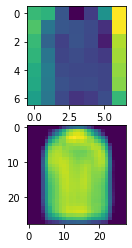

In [0]:
prom0=np.sum(enc.predict(x_val_scaled[np.where(y_val==6)[0]]),axis=0)/1000
ax = plt.subplot(2,1,1)
plt.imshow(prom0.reshape(7,7))
ax = plt.subplot(2,1,2)
plt.imshow(dec.predict(prom0.reshape(1,7,7,1)).reshape(28,28))
plt.show()

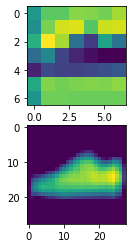

In [0]:
prom0=np.sum(enc.predict(x_val_scaled[np.where(y_val==7)[0]]),axis=0)/1000
ax = plt.subplot(2,1,1)
plt.imshow(prom0.reshape(7,7))
ax = plt.subplot(2,1,2)
plt.imshow(dec.predict(prom0.reshape(1,7,7,1)).reshape(28,28))
plt.show()

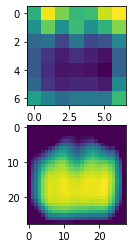

In [0]:
prom0=np.sum(enc.predict(x_val_scaled[np.where(y_val==8)[0]]),axis=0)/1000
ax = plt.subplot(2,1,1)
plt.imshow(prom0.reshape(7,7))
ax = plt.subplot(2,1,2)
plt.imshow(dec.predict(prom0.reshape(1,7,7,1)).reshape(28,28))
plt.show()

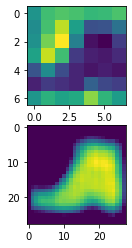

In [0]:
prom0=np.sum(enc.predict(x_val_scaled[np.where(y_val==9)[0]]),axis=0)/1000
ax = plt.subplot(2,1,1)
plt.imshow(prom0.reshape(7,7))
ax = plt.subplot(2,1,2)
plt.imshow(dec.predict(prom0.reshape(1,7,7,1)).reshape(28,28))
plt.show()

Al promediar todas las representaciones de cada clase, el decoder si puede construir una imagen de la clase.

# 3 - GAN para MNIST 

Probablemente uno de los desarrollos recientes del area de las redes neuronales más interesantes son las GAN, o _Generative Adversarial Networks_. Estas han deslumbrado al mundo los últimos años generando resultados inesperados, como los llamados _deep fakes_ (https://www.youtube.com/watch?v=dh-QM54RuAs), caras no no existentes generadas artificialmente, entre muchas otras aplicaciones de las cuales las más creativas y divertidas son ampliamente divulgadas. Estos resultados nos dan cuenta que estas redes cuando son implementadas correctamente tienen la habilidad de realizar tareas muy especificas logrando desempeños que en logran incluso en algunos casos engañar a observadores humanos.

<img src="https://pathmind.com/images/wiki/GANs.png" background="white">

Dependiendo del problema que uno quiera resolver las GAN no requieren datos etiquetados. Esto lo logran gracias a su estructura adversarial, es decir, donde simultaneamente se entrenan dos redes, una especializada en generar datos y otra red especializada en discriminar datos verdaderos de datos falsos, en su configuración más simple al menos. En esta parte de la tarea deberan generar una red de este tipo que genere dígitos que aparenten ser hechos a mano. Para esto utilizaremos las imagenes de entrenamiento del dataset MNIST que ya conocen.

A diferencia de otras preguntas, en esta deberán tener mayor iniciativa propia y solamente se presentará una estructura básica la cual ustedes deberán completar y ajustar para que el entrenamiento se realice bien. Además deberán:

* Graficar alguna medida del desempeño tanto del generador como del disciminador (por ejemplo f1-score, precision and recall o accuracy) a lo largo del entrenamiento. ¿Variaciones en esta medidas representan mejoras en nuestra red?
* Visualizar imagenes generadas por el generador a lo largo del entrenamiento y ver su evolución (idealmente graficar epocas representativas de etapas del entrenamiento)
* Explicar el comportamiento de la evolución de ambos desempeños y por qué no necesariamente esos valores representan que la red alcance su cometido
* Describir, teórica o práctiamente, que ocurriría si la red generadora no pudiera por algún motivo (divergencia en entrenamiento, excesivo _underfitting_, etc) generar imágenes razonables.
* Describir la contraparte de lo que ocurriría si la red discriminadora no pudiera aprender a diferenciar imagenes reales de ruido aleatorio.
* Una vez teniendo una red entrenada a completitud, muestre varias imagenes generadas. ¿Se logra obtener imagenes convincentes?
* Igualmente con la red entrenada, guarde el ruido aleatorio que origina dos números reconocibles distintos. ¿Qué ocurre si vemos las imagenes generadas por el generador al entregarle puntos distribuidos linealmente entre los dos puntos?
* Proponga o investigue como realizaría las siguientes tareas:
    * A partir de una base de datos de imagenes RGB, entrenar una GAN que genere imágenes a color convincentes a partir de imagenes en blanco y negro, es decir que deduzca el color a partir de imagenes en blanco y negro.
    * A partir de una base de datos de cuadros de paisajes reales y las fotos correspondientes al cuadro, entrenar una GAN que permita transformar fotografias a cuadros y viceversa (puede utilizar más de 2 redes)
    * Proponga un problema que les parezca interesante y una estructura de GAN que le permitiría resolverlo
    
Esta pregunta si bien es libre, debe ser redactada de manera ordenada. La recomendación es separar tanto el código como las respuestas en varios bloques, y enunciar nuevamente las preguntas o redactar sus respuestas de manera que no quede duda a qué pregunta en particular estan respondiendo. El código de abajo está incompleto y es solo una guía (de todas formas la estructura y entrenamiento de la red "funciona", aunque se recomienda prueben pequeños cambios), puede crear funciones, cambiar nombres e incluso las redes mismas como estimen conveniente, la intención es que se aproximen a la exploración que deberán hacer si alguna vez les toca resolver un problema real con ANN y luego reportar sus resultados. 

<!-- glhf -->

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


dis loss: 0.6929468
gen loss: 5.9667788


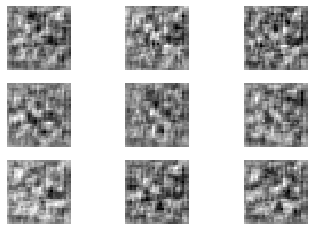

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


dis loss: 0.21602954
gen loss: 2.0931733


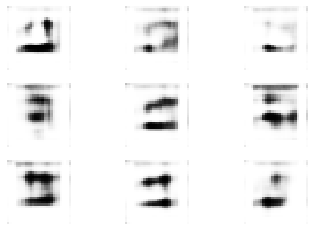

dis loss: 0.42145443
gen loss: 1.4171289


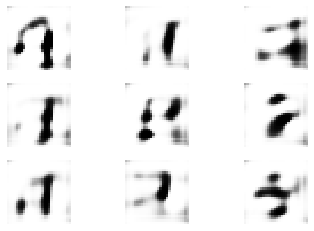

dis loss: 0.34355494
gen loss: 1.3724157


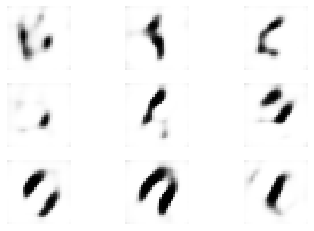

dis loss: 0.33150673
gen loss: 0.38301656


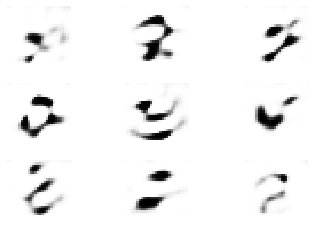

dis loss: 0.3896403
gen loss: 1.1336852


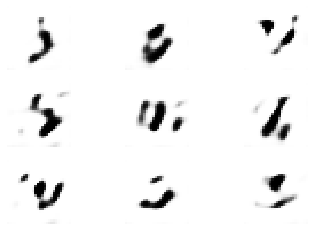

dis loss: 0.32469356
gen loss: 1.1538132


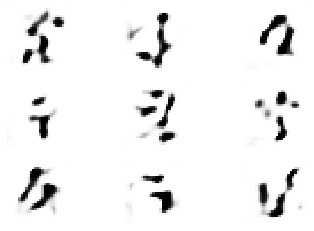

dis loss: 0.30516902
gen loss: 1.4464046


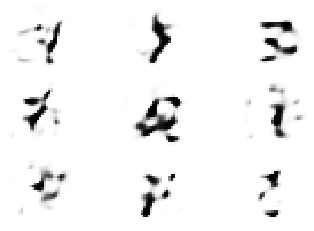

dis loss: 0.35969368
gen loss: 2.1426275


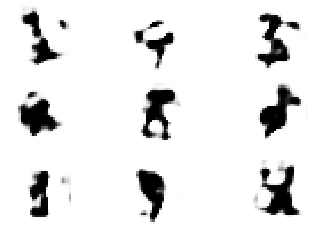

dis loss: 0.47600725
gen loss: 1.2507854


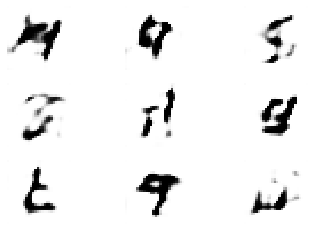

dis loss: 0.3815229
gen loss: 2.6107419


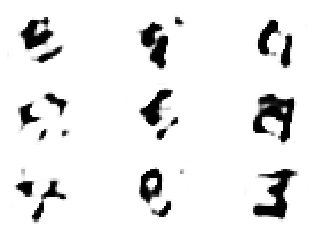

dis loss: 0.41397372
gen loss: 1.5451384


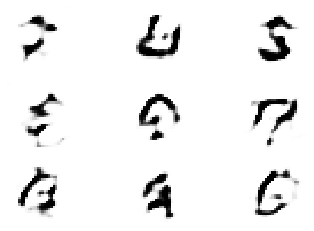

dis loss: 0.27869493
gen loss: 1.6694784


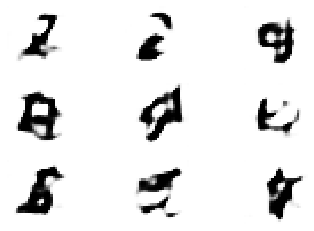

dis loss: 0.48220497
gen loss: 1.2829003


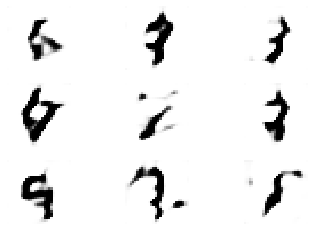

dis loss: 0.39051196
gen loss: 1.5513417


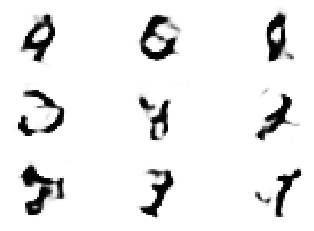

dis loss: 0.38416055
gen loss: 1.8561165


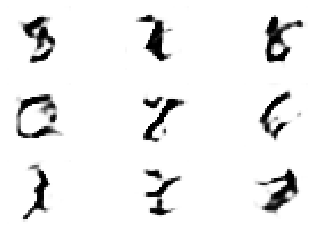

dis loss: 0.41185233
gen loss: 2.089753


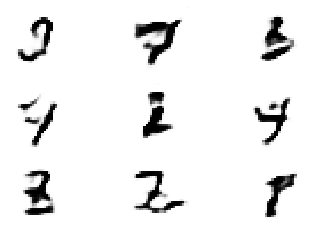

dis loss: 0.35999602
gen loss: 1.9225953


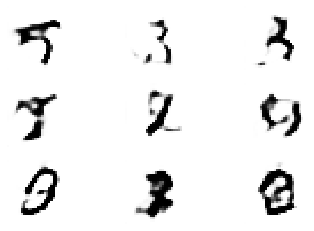

dis loss: 0.40110725
gen loss: 2.1137826


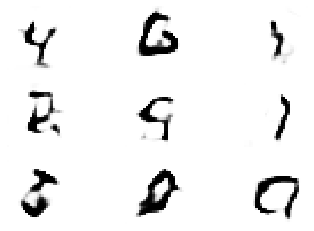

dis loss: 0.515849
gen loss: 1.0248978


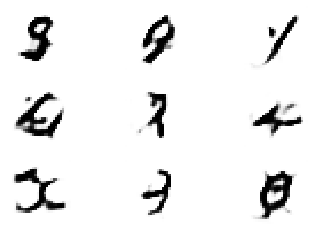

dis loss: 0.38124657
gen loss: 2.264185


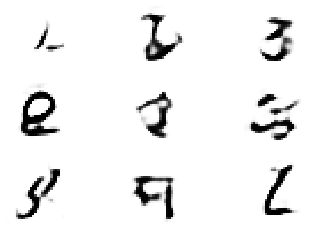

dis loss: 0.59559166
gen loss: 1.8708347


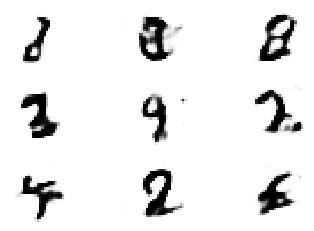

dis loss: 0.50764537
gen loss: 1.9428535


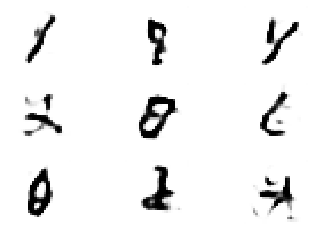

dis loss: 0.46445218
gen loss: 1.1966408


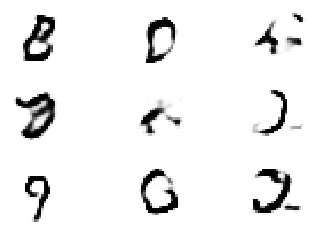

dis loss: 0.42401707
gen loss: 1.7975538


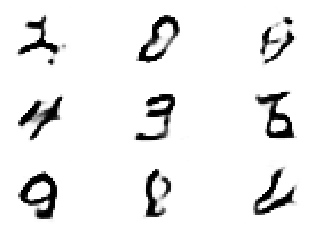

dis loss: 0.4430554
gen loss: 1.9450259


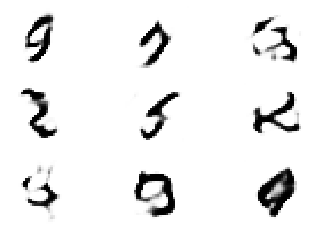

dis loss: 0.44720167
gen loss: 1.7356578


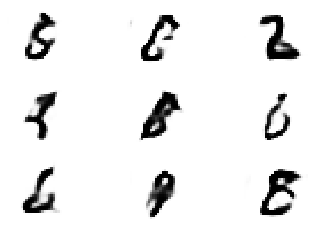

dis loss: 0.4862814
gen loss: 1.5186632


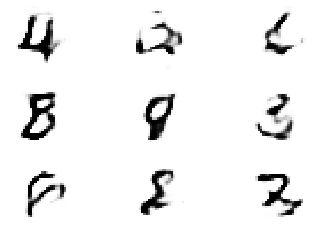

dis loss: 0.4057675
gen loss: 1.3201411


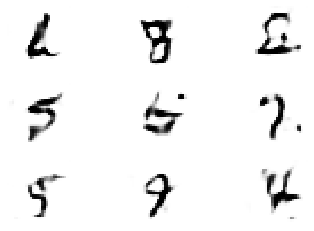

dis loss: 0.4709928
gen loss: 1.866913


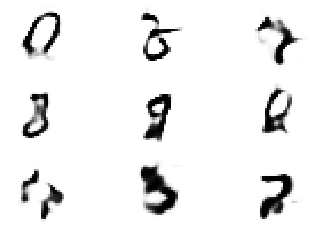

dis loss: 0.52707547
gen loss: 0.9608476


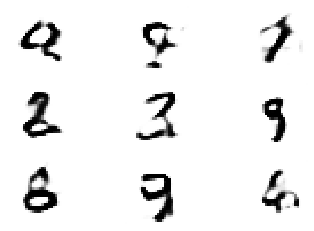

dis loss: 0.4177814
gen loss: 1.8453698


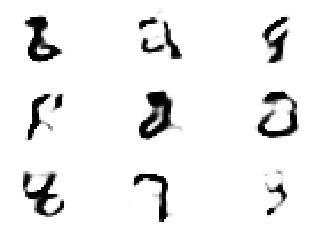

dis loss: 0.50189984
gen loss: 1.0603062


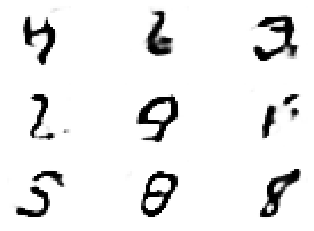

dis loss: 0.4400895
gen loss: 1.9352689


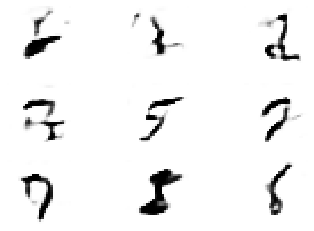

dis loss: 0.48601758
gen loss: 1.4962596


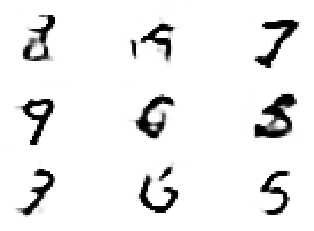

dis loss: 0.44140273
gen loss: 1.5680374


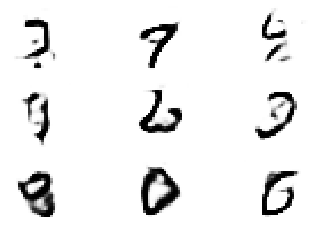

dis loss: 0.45828852
gen loss: 1.7380953


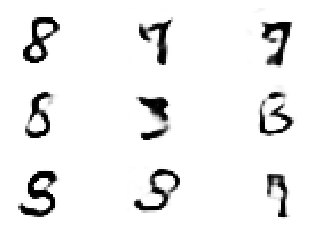

dis loss: 0.46175617
gen loss: 1.319873


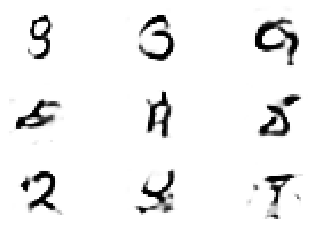

dis loss: 0.47057825
gen loss: 1.315865


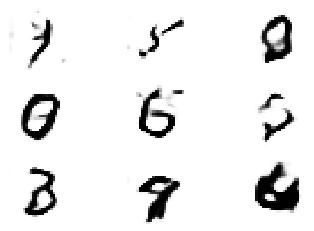

dis loss: 0.4763767
gen loss: 1.4904989


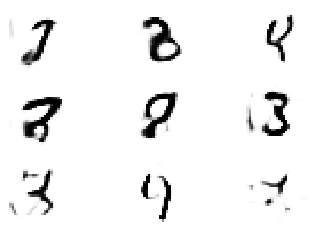

dis loss: 0.5667831
gen loss: 1.89145


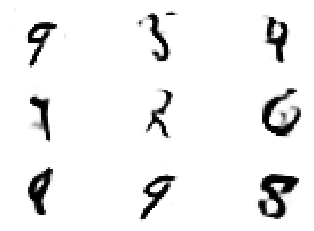

dis loss: 0.5395022
gen loss: 1.4022815


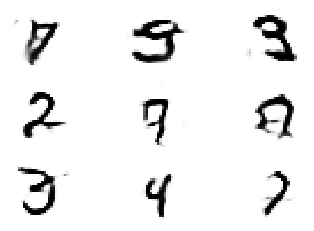

dis loss: 0.5172695
gen loss: 2.2049696


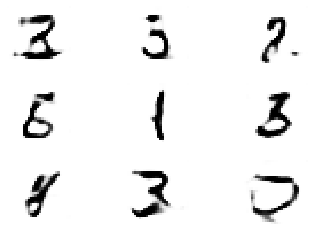

dis loss: 0.5103534
gen loss: 2.4317653


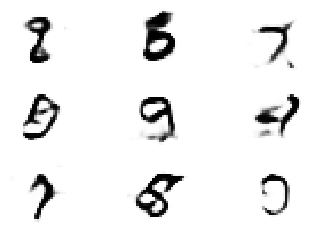

dis loss: 0.4726921
gen loss: 1.2023097


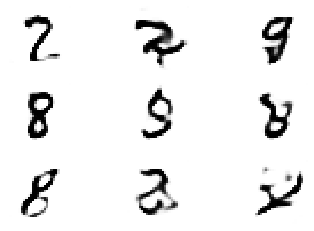

dis loss: 0.41839927
gen loss: 1.6306877


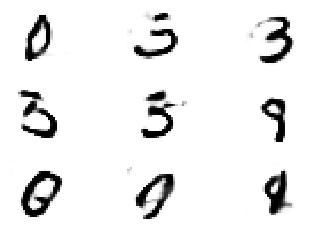

dis loss: 0.46763694
gen loss: 1.7398651


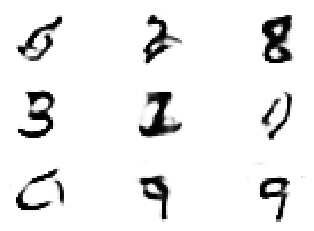

dis loss: 0.45015344
gen loss: 2.0113485


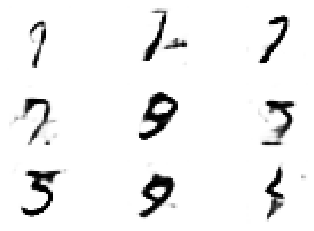

dis loss: 0.5371828
gen loss: 1.3612673


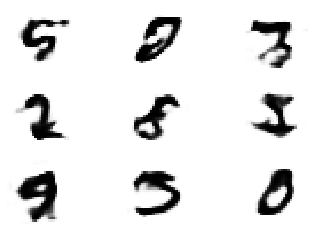

dis loss: 0.52831036
gen loss: 1.3074256


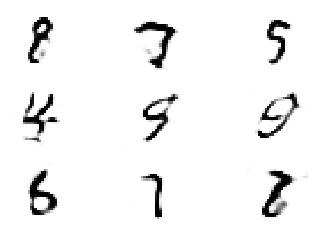

dis loss: 0.5048048
gen loss: 1.5457647


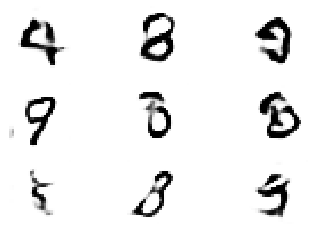

dis loss: 0.4366998
gen loss: 1.4408276


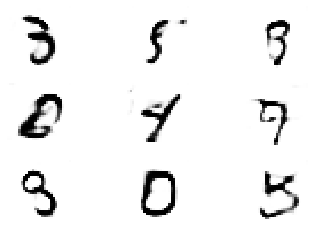

dis loss: 0.5374088
gen loss: 1.6112977


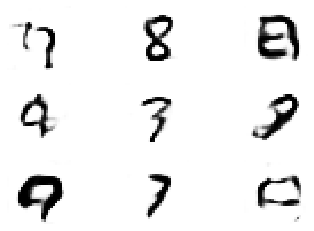

dis loss: 0.45871365
gen loss: 1.6366658


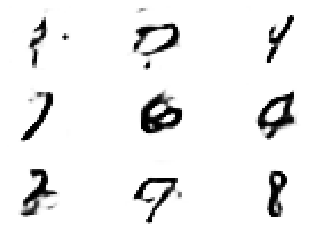

dis loss: 0.4286455
gen loss: 2.8903966


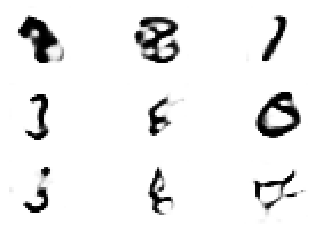

dis loss: 0.5262967
gen loss: 1.1883782


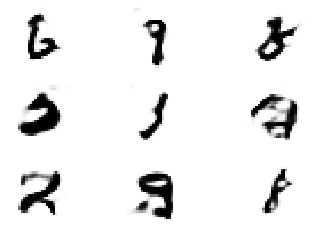

dis loss: 0.480975
gen loss: 1.8406465


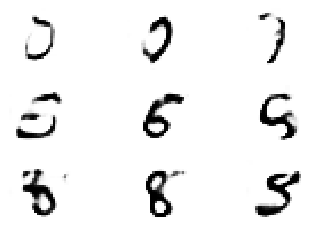

dis loss: 0.47192308
gen loss: 1.3810784


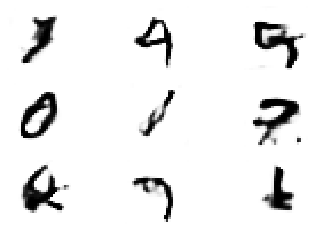

dis loss: 0.47104096
gen loss: 1.6636276


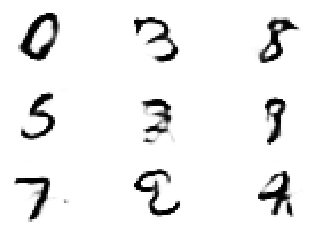

dis loss: 0.5072293
gen loss: 1.0783265


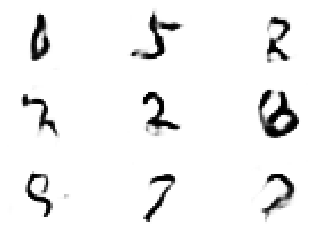

dis loss: 0.5299596
gen loss: 1.3281898


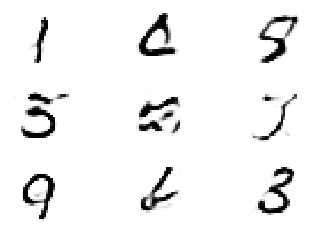

dis loss: 0.45917255
gen loss: 1.7804974


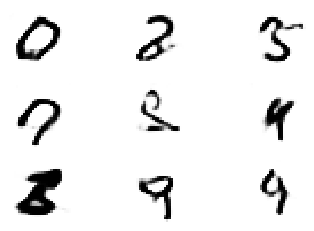

dis loss: 0.4452296
gen loss: 1.1812527


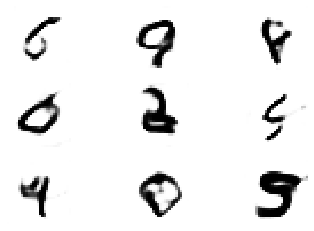

dis loss: 0.5929972
gen loss: 1.9055823


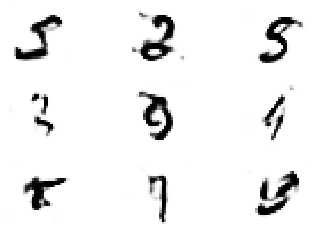

dis loss: 0.42471254
gen loss: 1.1086209


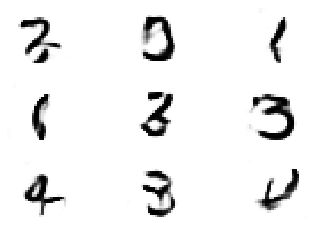

dis loss: 0.4889895
gen loss: 1.5358704


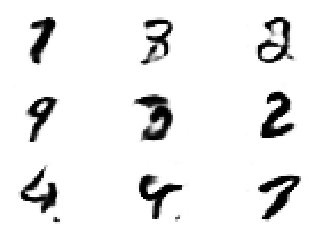

dis loss: 0.48396778
gen loss: 1.6183162


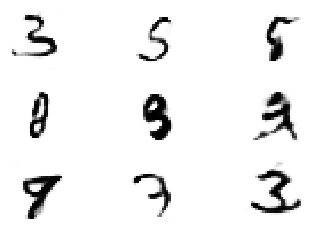

dis loss: 0.4603751
gen loss: 1.5651221


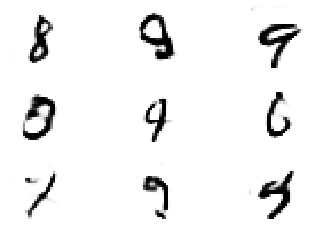

dis loss: 0.45012397
gen loss: 1.109323


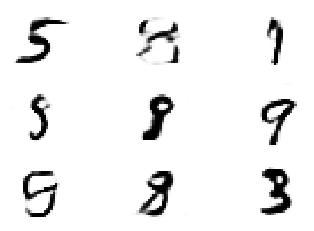

dis loss: 0.43598658
gen loss: 1.7881274


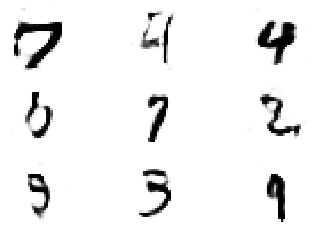

dis loss: 0.45175493
gen loss: 1.4260832


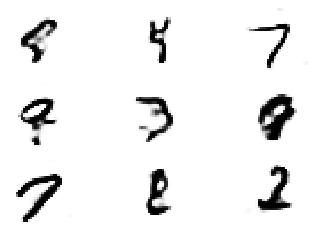

dis loss: 0.5441532
gen loss: 2.2024207


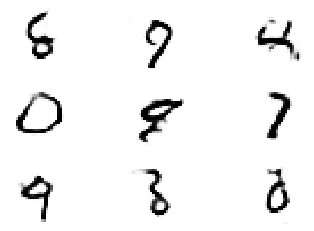

dis loss: 0.50057894
gen loss: 1.9641532


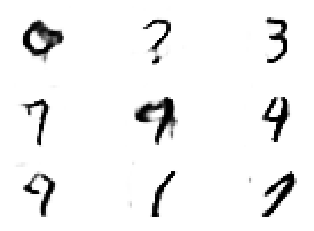

dis loss: 0.47115242
gen loss: 1.6624874


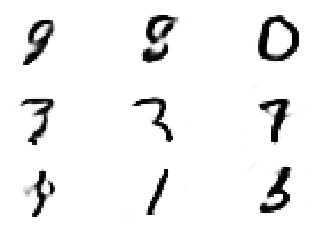

dis loss: 0.5260053
gen loss: 1.1465826


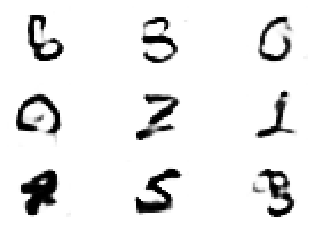

dis loss: 0.41713443
gen loss: 1.6553056


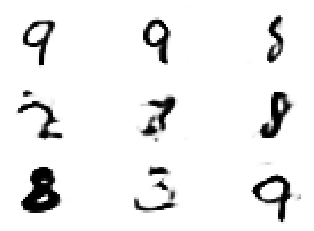

dis loss: 0.49464446
gen loss: 1.4099091


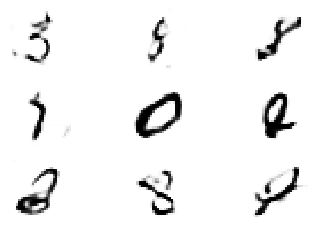

dis loss: 0.56600314
gen loss: 1.1052909


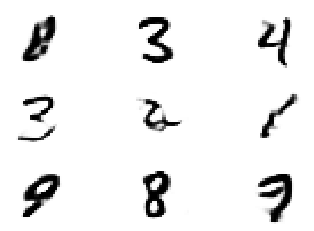

dis loss: 0.52393055
gen loss: 1.4320407


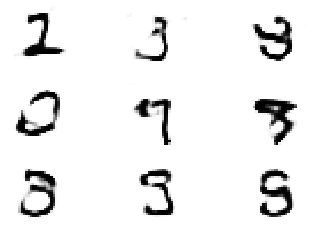

dis loss: 0.45630175
gen loss: 1.1828613


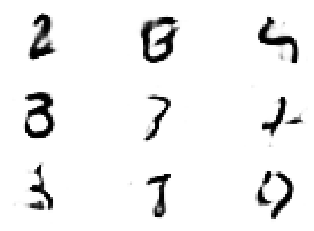

dis loss: 0.56038743
gen loss: 1.2032604


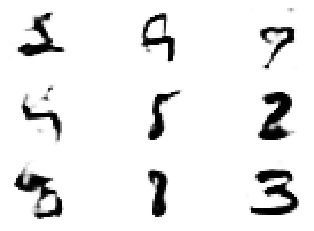

dis loss: 0.53486407
gen loss: 1.349488


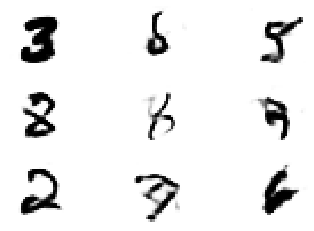

dis loss: 0.56892276
gen loss: 1.0332457


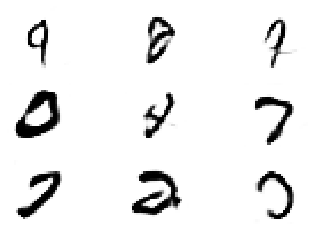

dis loss: 0.44474024
gen loss: 1.3760815


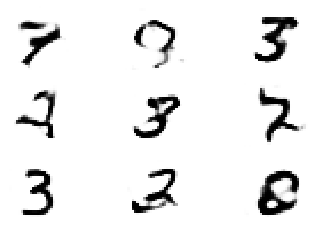

dis loss: 0.464085
gen loss: 1.8878403


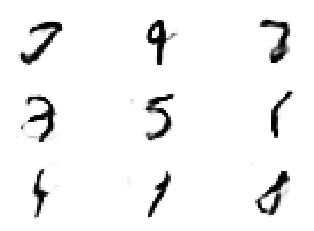

dis loss: 0.5034801
gen loss: 1.6622262


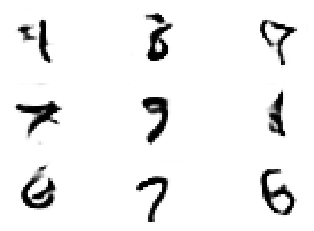

dis loss: 0.4305293
gen loss: 1.4447033


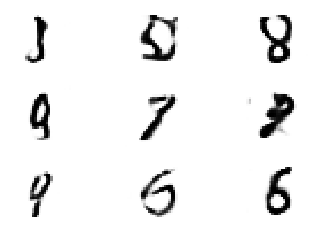

dis loss: 0.49431637
gen loss: 1.8552307


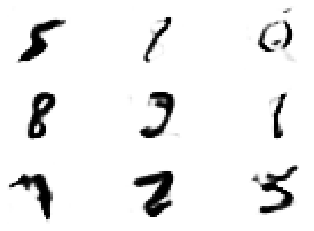

dis loss: 0.5573416
gen loss: 2.3185287


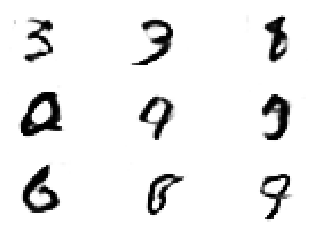

dis loss: 0.60998
gen loss: 0.97449535


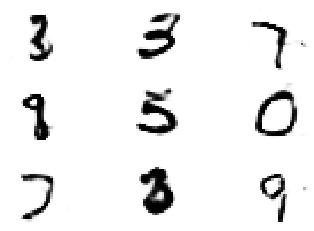

dis loss: 0.5017551
gen loss: 2.1067414


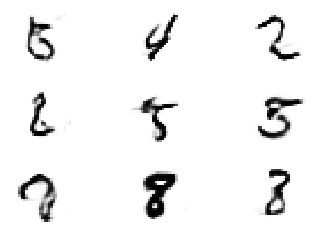

dis loss: 0.47156465
gen loss: 1.9717481


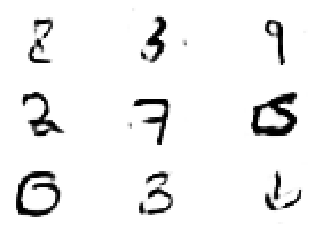

dis loss: 0.42065272
gen loss: 1.7844393


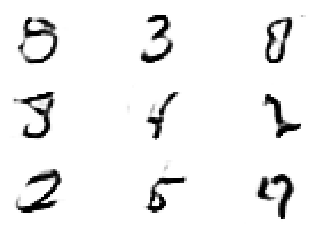

dis loss: 0.5015991
gen loss: 1.1864367


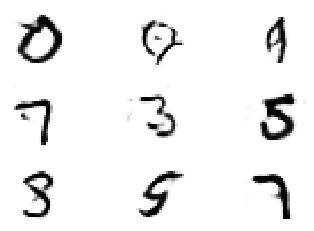

dis loss: 0.5519047
gen loss: 1.2961802


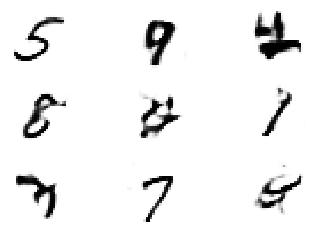

dis loss: 0.45764965
gen loss: 1.6794766


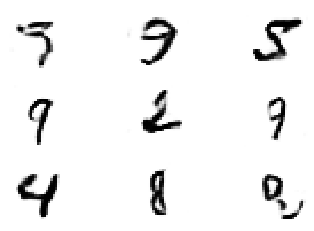

dis loss: 0.4897393
gen loss: 1.1999788


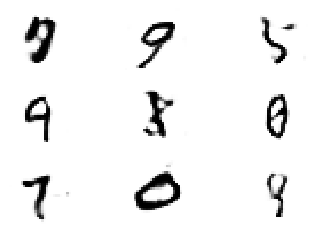

dis loss: 0.51697606
gen loss: 1.4299977


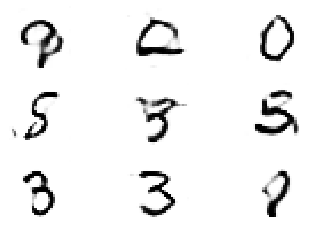

dis loss: 0.54620165
gen loss: 0.91329074


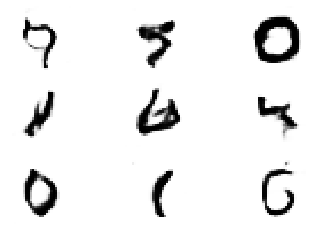

dis loss: 0.44776198
gen loss: 1.668293


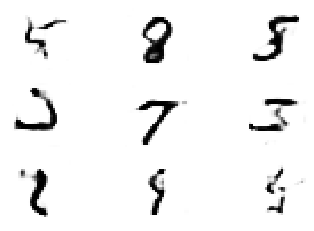

In [0]:
from keras.datasets import mnist
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import UpSampling2D
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
(x,_),(_,_) = mnist.load_data()
x = x.reshape((-1,28,28,1)).astype(np.float32)
x = x/255

input_shape=x.shape
dropout_prob=0.5

generator_net = Sequential()
generator_net.add(Dense(7*7*256))
generator_net.add(BatchNormalization(momentum=0.9))
generator_net.add(LeakyReLU())
generator_net.add(Reshape((7,7,256)))
generator_net.add(Dropout(dropout_prob))
generator_net.add(UpSampling2D())
generator_net.add(Conv2D(128, 5, padding='same'))
generator_net.add(BatchNormalization(momentum=0.9))
generator_net.add(LeakyReLU())
generator_net.add(UpSampling2D())
generator_net.add(Conv2D(64, 5, padding='same'))
generator_net.add(BatchNormalization(momentum=0.9))
generator_net.add(LeakyReLU())
generator_net.add(Conv2D(32, 5, padding='same'))
generator_net.add(BatchNormalization(momentum=0.9))
generator_net.add(LeakyReLU())
generator_net.add(Conv2D(1, 5, padding='same',activation='sigmoid'))


discriminator_net = Sequential()
discriminator_net.add(Conv2D(64, 5, strides=2, input_shape=input_shape[1:], padding='same'))
discriminator_net.add(LeakyReLU())
discriminator_net.add(Conv2D(128, 5, strides=2, padding='same'))
discriminator_net.add(LeakyReLU())
discriminator_net.add(Dropout(dropout_prob))
discriminator_net.add(Conv2D(256, 5, strides=2, padding='same'))
discriminator_net.add(LeakyReLU())
discriminator_net.add(Dropout(dropout_prob))
discriminator_net.add(Conv2D(512, 5, strides=1, padding='same'))
discriminator_net.add(LeakyReLU())
discriminator_net.add(Dropout(dropout_prob))
discriminator_net.add(Flatten())
discriminator_net.add(Dense(1,activation='sigmoid'))
optimizer_discriminator = RMSprop(lr=0.0008, clipvalue=1.0, decay=1e-10)

discriminator = Sequential()
discriminator.add(discriminator_net)
discriminator.compile(loss='binary_crossentropy', optimizer = optimizer_discriminator, metrics=['accuracy'])

gan = Sequential()
gan.add(generator_net)
for layer in discriminator_net.layers:
    layer.trainable = False
gan.add(discriminator_net)
optimizer_gan = Adam(lr=0.0004, clipvalue=1.0, decay=1e-10)
gan.compile(loss='binary_crossentropy', optimizer=optimizer_gan, metrics=['accuracy'])

n_samples=128

dis_metric=np.zeros(int(20*int(x.shape[0]/(n_samples*2))))
gen_metric=np.zeros(int(20*int(x.shape[0]/(n_samples*2))))
indice=0
for i in range(20):
    #batch es 128*2=256
    for j in range(int(x.shape[0]/(n_samples*2))):
      ix = np.random.randint(0, x.shape[0], n_samples)
      x_real = x[ix]  # select batch_size random images from x
      noise = np.random.rand(28 * 28 * n_samples)
      noise = noise.reshape((n_samples, 28*28))# generate (batch_size,latent_dim) sized noise
      x_false = generator_net.predict(noise)
      y_real= np.ones((n_samples, 1))
      y_false = np.zeros((n_samples, 1))
      x_train = np.concatenate((x_real, x_false))
      y_train = np.concatenate((y_real, y_false))
      response_dis = discriminator.train_on_batch(x_train, y_train)
      noise2 = np.random.rand(28 * 28 * n_samples*2)
      noise2 = noise2.reshape((n_samples*2, 28*28))# generate (batch_size,latent_dim) sized noise
      response_gen = gan.train_on_batch(noise2 , np.ones((n_samples*2, 1)))
      dis_metric[indice]=response_dis[1]
      gen_metric[indice]=response_gen[1]
      indice=indice+1
      if j%50==0:
          print("dis loss: "+str(response_dis[0]))
          print("gen loss: "+str(response_gen[0]))
          # plot random generated images and losses and accuracies
          n=3
          for i in range(n * n):
            # define subplot
            plt.subplot(n, n, 1 + i)
            # turn off axis
            plt.axis('off')
            # plot raw pixel data
            plt.imshow(x_false[i, :, :, 0], cmap='gray_r')
          plt.show()

__Plots de accuracies__ El primer grafico corresponde a las precisiones del discriminador y el segundo a las del generador concatenado con el discriminador. Se puede ver como como al principio el discriminador itera entre accuracies muy altos y muy bajos, correspondiente a imágenes reales y falsas, pero luego el generador logra confundirla y las precisiones bajan y se concentran en un rango que de todas maneras es alto entre 0.7 y 0.8.

Las accuracies del la red generadora son bajos ya que le "mentimos" a la red de manera que aprenda los pesos. Al entrenarla, le damos una imágen falsa y le decimos que es verdadera. Esto genera perdidas altas y accuracies bajos (los vistos en el gráfico) que permiten al generador aprender más cuando el discriminador distingue muy bien, y viceversa.

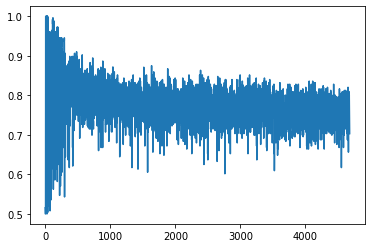

In [0]:
plt.plot(dis_metric)

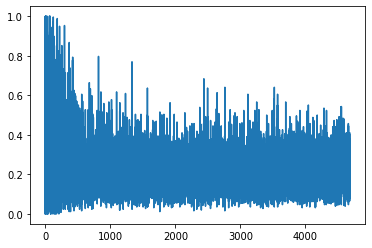

In [0]:
plt.plot(gen_metric)

__Imagenes generadas__: Aunque algunas imágenes se ven borrosas como la última de la primera fila, en general si se logran interpretar como números. 

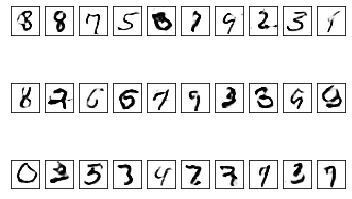

In [0]:
ix=1
for u in range(10):
  for v in range(3):
    ax = plt.subplot(3,10,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(generator_net.predict(np.random.rand(28*28).reshape(1,28*28)).reshape(28,28),cmap='gray_r')
    ix += 1
plt.show()

Al ver los errores, se observa que los errores del discriminador se mueven entre 0.2 y 0.7, mientras que los del generador se mueven entre 1 y 1.9. 
Se imprime imágenes cada 50 iteraciones.
En las primeras iteraciones las imágenes generadas pasan de solo ruido a ruido en la parte central y bordes blancos. Luego de 100 iteraciones pasa a generar imágenes con manchas al medio y después de 200 más parecen simbolos de algún lenguaje. No es hasta después de casi 2000 iteraciones que se aprecian números claros.

Si la red no pudiese generar imagenes razonables, entonces el discriminador se "adelantaría" y aprendería demaciado bien a discriminar. Al actualizar el generador, como discriminador entregaria un resultado muy cercano a 0, este actualizará más, pues backpropagation actualizará con una salida de 1-(numero cercano a 0). Esta será una actualización "grande" y por lo tanto el generador alcanzará más rapido al discriminador. Un problema de esto es que, si el discriminador se mantiene muy bien esto tenderá al problema de colapso modal, en donde el generador genera imágenes muy parecida, las cuales corresponden a una de las modas de la distribución representada por el discriminador.

En el caso inverso pasará algo distinto: Si el discriminador no puede aprender bien a distinguir, entonces el generador no necesitará aprender a generar buenas imágenes para engañar al discriminador, llevando a un bajo entrenamiento y a una saturación muy temprana.

Tomaremos ruido que genera dos imágenes que parecen números distintos: El número 9 y el número 5.

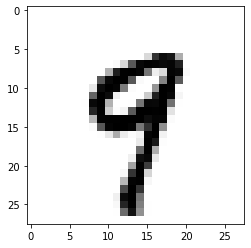

In [0]:
np.random.seed(0)
a=np.random.rand(28*28).reshape(1,28*28)
a_im=generator_net.predict(a)
plt.imshow(a_im.reshape(28,28), cmap='gray_r')

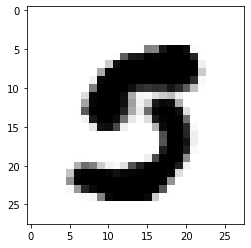

In [0]:
b=np.random.rand(28*28).reshape(1,28*28)
b_im=generator_net.predict(b)
plt.imshow(b_im.reshape(28,28), cmap='gray_r')


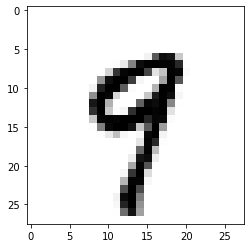

In [0]:
c=0.9*a+0.1*b
c_im=generator_net.predict(c)
plt.imshow(c_im.reshape(28,28), cmap='gray_r')


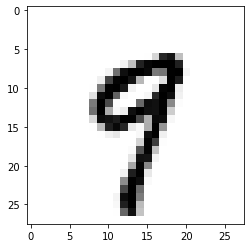

In [0]:
c=0.7*a+0.3*b
c_im=generator_net.predict(c)
plt.imshow(c_im.reshape(28,28), cmap='gray_r')

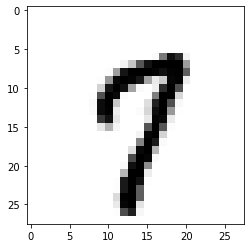

In [0]:
c=0.5*a+0.5*b
c_im=generator_net.predict(c)
plt.imshow(c_im.reshape(28,28), cmap='gray_r')

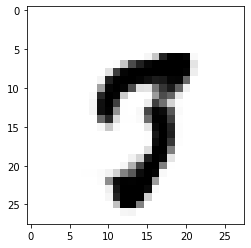

In [0]:
c=0.3*a+0.7*b
c_im=generator_net.predict(c)
plt.imshow(c_im.reshape(28,28), cmap='gray_r')

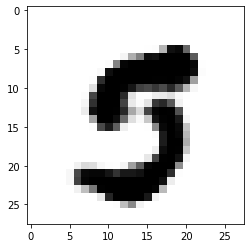

In [0]:
c=0.1*a+0.9*b
c_im=generator_net.predict(c)
plt.imshow(c_im.reshape(28,28), cmap='gray_r')

Se ve que al moverse linealmente entre un espacio y otro, el generador tambien se mueve linealmente, desdibujando paso por paso el 9 para llevarlo a un 5.

Ambos problemas son resueltos con tecnicas de Style Transfer, para cada problema daremos una tecnica distinta.

Colorear imágenes: 

La estrategia fue sacada desde aqui https://arxiv.org/pdf/1803.05400.pdf. El autor llama su estrategia una GAN condicional. En palabras simples, en lugar de entrar ruido al generador, entra una imagen en blanco y negro. El discriminador toma como inputs imágenes coloreadas reales y las creadas por el generador, además recibirá la imagen en blanco y negro como guia, y se entrenará para que distinga cual entrada corresponde al coloreo de la imagen en blanco y negro. 
<img src="https://github.com/gekkoseba/Redes-neuronales/blob/master/Tareas/conditionalgan.png?raw=1" >
Transformar fotos a cuadros:

Información encontrada desde aqui https://arxiv.org/pdf/1703.10593.pdf. Este tipo de red se denomina CycleGan. Usan un generador para transformar una imagen de un estilo a otro, con una arquitectura con cuello de botella similar a un autoencoder. El discriminador luego es entrenado para distinguir que imagen es falsa y que imagen es real. La verdadera innovación de las CycleGan viene en su mecanismo para evitar el fenómeno de Mode Colapse. Para esto, además de la Gan ya descrita se concatena otra red Gan, cuyo generador tomará como input el output del generador ya descrito y lo transformará a su forma original (por ejemplo, si el primer generador transformaba fotografías a pinturas, este segundo generador transformará pinturas a fotografías) y el discrimandor distinguirá si la imagen es real o no. Además, se agrega una función de perdida entre el input del primer generador y el output del segundo, de manera que al entrenarse estos sean lo más parecido posible.
<img src="https://github.com/gekkoseba/Redes-neuronales/blob/master/Tareas/cyclegan.png?raw=1">

__Problema interesante:__ GAN que reciba imágenes 2D para generar modelos 3D de la imagen. Para este problema se puede usar cualquiera de los métodos presentados, es necesario además usar convoluciones3D y tener acceso a un dataset de modelos 3D.
Por ejemplo, usando una CycleGan, el input del generador sería una imagen 2D, y intentaría transformar a una imagen 3D y el discriminador distinguiría entre ejemplos reales y falsos. El segundo GAN haría lo contrario, y la perdida L2 nos aseguraría de que el modelo construido efectivamente corresponde al de la imagen 2D.